<a href="https://colab.research.google.com/github/okwasna/praca_inzynierska/blob/main/wersja_ostateczna222222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:


file_path = 'summary_htseq_norm2.xlsx'
df = pd.read_excel(file_path, sheet_name='summary_htseq')

print(f"Liczba genów przed filtrowaniem: {len(df)}")

mean_before_filtering = df['var'].mean()
variance_before_filtering = df['var'].var()

print(f"Średnia wariancji przed filtrowaniem: {mean_before_filtering}")
print(f"Wariancja przed filtrowaniem: {variance_before_filtering}")

variance_threshold = 10

df_filtered = df[df['var'] >= variance_threshold]

mean_after_filtering = df_filtered['var'].mean()
variance_after_filtering = df_filtered['var'].var()

print(f"Średnia wariancji po filtrowaniu: {mean_after_filtering}")
print(f"Wariancja po filtrowaniu: {variance_after_filtering}")

initial_counts = df['lncRNA'].value_counts()

filtered_counts = df_filtered['lncRNA'].value_counts()

removed_counts = initial_counts - filtered_counts

removed_0 = removed_counts.get(0, 0)
removed_1 = removed_counts.get(1, 0)

print(f"Liczba genów usuniętych z lncRNA = 0: {removed_0}")
print(f"Liczba genów usuniętych z lncRNA = 1: {removed_1}")

total_genes_after_filtering = len(df_filtered)
print(f"Łączna liczba genów po filtrowaniu: {total_genes_after_filtering}")

Liczba genów przed filtrowaniem: 28677
Średnia wariancji przed filtrowaniem: 83837021.10925484
Wariancja przed filtrowaniem: 1.4257388777828288e+20
Średnia wariancji po filtrowaniu: 108068243.92073244
Wariancja po filtrowaniu: 1.837809291273408e+20
Liczba genów usuniętych z lncRNA = 0: 3473
Liczba genów usuniętych z lncRNA = 1: 2957
Łączna liczba genów po filtrowaniu: 22247


In [4]:
print(f"Liczba próbek (kolumn) branych pod uwagę do klastrowania: {df_filtered.shape[1]}")
print(f"Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: {df_filtered.shape[0]}")


Liczba próbek (kolumn) branych pod uwagę do klastrowania: 31
Liczba genów (wierszy) branych pod uwagę po wybraniu próbek do klastrowania: 22247


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

data_values = df_filtered.loc[:, 'SRR7451446':]
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    print(f"\nKMeans dla {n_clusters} klastrów:")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50)
    kmeans.fit(data_normalized)


    df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


    silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
    print(f"Średni wskaźnik Silhouette dla {n_clusters} klastrów: {silhouette_avg:.4f}")


    silhouette_values = silhouette_samples(data_normalized, kmeans.labels_)
    df_filtered['Silhouette'] = silhouette_values


    cluster_silhouette_means = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean()
    print(f"Średni wskaźnik Silhouette dla każdego klastra:\n{cluster_silhouette_means}")


    cluster_counts = df_filtered[f'Cluster_{n_clusters}'].value_counts()
    print(f"Ilość genów w każdym klastrze dla {n_clusters} klastrów:\n{cluster_counts}")

print(f"Całkowita liczba genów przypisanych do klastrów: {len(df_filtered)}")



KMeans dla 40 klastrów:


<ipython-input-19-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 40 klastrów: 0.7401


<ipython-input-19-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_40
0     0.624161
1     0.000000
2     0.968713
3     0.000000
4     0.832462
5     0.000000
6     0.838016
7     0.555884
8     0.430772
9     0.049564
10    0.000000
11    0.936506
12    0.155849
13    0.484564
14    0.719740
15    0.000000
16    0.685144
17    0.611098
18    0.984541
19    0.000000
20    0.000000
21    0.000000
22    0.299977
23    0.484064
24    0.000000
25    0.267292
26    0.000000
27    0.431176
28    0.131810
29    0.218005
30    0.273388
31    0.622031
32    0.000000
33    0.000000
34    0.000000
35    0.111611
36    0.185480
37    0.227255
38    0.718321
39    0.312728
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 40 klastrów:
Cluster_40
2     7627
6     1451
38    1313
17    1195
13    1185
11    1033
4      868
7      798
14     778
31     766
16     695
25     648
0      627
23     562
18     520
22     457
36     373
39     364
37     316
8      259
27     185
29     125
9       

<ipython-input-19-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 45 klastrów: 0.7457


<ipython-input-19-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_45
0     0.967108
1     0.000000
2     0.716984
3     0.000000
4     0.106724
5     0.482770
6     0.000000
7     0.716442
8     0.000000
9     0.564174
10    0.000000
11    0.114573
12    0.936765
13    0.147067
14    0.836034
15    0.505551
16    0.984224
17    0.000000
18    0.430306
19    0.581935
20    0.000000
21    0.000000
22    0.682864
23    0.217749
24    0.000000
25    0.225753
26    0.711559
27    0.313339
28    0.000000
29   -0.009500
30    0.000000
31    0.305687
32    0.000000
33    0.352763
34    0.238213
35    0.156285
36    0.640858
37    0.286774
38    0.231852
39    0.000000
40    0.506896
41    0.199313
42    0.458289
43    0.025105
44    0.832624
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 45 klastrów:
Cluster_45
0     7627
14    1451
2     1314
15    1147
7     1045
12    1033
44     868
9      793
26     782
36     757
22     695
19     642
5      562
31     544
16     520
27     447

<ipython-input-19-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 50 klastrów: 0.7471


<ipython-input-19-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_50
0     0.937011
1     0.000000
2     0.000000
3     0.434384
4     0.970145
5     0.813343
6     0.643997
7     0.258859
8     0.000000
9     0.149452
10    0.835850
11    0.000000
12    0.278529
13    0.000000
14    0.232883
15    0.984224
16    0.000000
17    0.772240
18    0.000000
19    0.158257
20    0.599761
21    0.000000
22    0.464789
23    0.430453
24    0.000000
25    0.000000
26    0.000000
27    0.467545
28    0.703877
29    0.640966
30    0.000000
31    0.279770
32    0.098496
33    0.282714
34    0.107980
35    0.000000
36    0.598002
37    0.000000
38    0.834740
39    0.000000
40    0.463786
41    0.473418
42    0.329211
43    0.208954
44    0.212140
45    0.135808
46    0.000000
47    0.089769
48    0.000000
49    0.509865
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 50 klastrów:
Cluster_50
4     7576
10    1451
38    1236
22    1188
0     1033
17    1012
5      873
28     786
6      751
2

<ipython-input-19-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 55 klastrów: 0.7566


<ipython-input-19-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


Średni wskaźnik Silhouette dla każdego klastra:
Cluster_55
0     0.968788
1     0.000000
2     0.682864
3     0.000000
4     0.419060
5     0.836451
6     0.096193
7     0.000000
8     0.000000
9     0.584439
10    0.000000
11    0.983462
12    0.000000
13    0.817519
14    0.689644
15    0.061853
16    0.249444
17    0.773087
18    0.937602
19    0.242835
20    0.000000
21    0.260097
22    0.449830
23    0.000000
24    0.000000
25    0.000000
26    0.371761
27    0.384411
28    0.172831
29    0.000000
30    0.146916
31    0.132031
32    0.559361
33    0.000000
34    0.598936
35    0.822549
36    0.000000
37    0.670099
38    0.258908
39    0.430473
40    0.277360
41    0.000000
42    0.489541
43    0.362010
44    0.000000
45    0.283153
46    0.657909
47    0.457966
48    0.217705
49    0.081018
50    0.427075
51   -0.164506
52    0.503647
53    0.000000
54    0.169874
Name: Silhouette, dtype: float64
Ilość genów w każdym klastrze dla 55 klastrów:
Cluster_55
0     7567
13    1450
5  

<ipython-input-19-656b8d934623>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'Cluster_{n_clusters}'] = kmeans.labels_


Średni wskaźnik Silhouette dla 60 klastrów: 0.7468
Średni wskaźnik Silhouette dla każdego klastra:
Cluster_60
0     0.770043
1     0.000000
2     0.000000
3     0.836455
4     0.147316
5     0.966302
6     0.467298
7     0.000000
8     0.000000
9     0.000000
10    0.542385
11    0.705147
12    0.591522
13    0.683189
14    0.000000
15    0.257639
16    0.983477
17    0.936946
18    0.337803
19    0.617388
20    0.000000
21    0.000000
22    0.000000
23    0.817884
24    0.000000
25    0.364042
26    0.122137
27    0.429491
28    0.000000
29    0.144054
30    0.607903
31    0.314170
32    0.303534
33    0.539187
34    0.649772
35    0.000000
36    0.000000
37    0.000000
38    0.495458
39    0.000000
40    0.145442
41    0.083151
42    0.824693
43    0.509197
44    0.000000
45    0.253946
46    0.162118
47    0.467593
48    0.384007
49    0.000000
50    0.000000
51    0.283442
52    0.000000
53    0.115183
54    0.249543
55    0.214682
56    0.000000
57    0.541651
58    0.055270
59   

<ipython-input-19-656b8d934623>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Silhouette'] = silhouette_values


In [20]:
import pandas as pd

results = []


cluster_ranges = range(40, 65, 5)

for n_clusters in cluster_ranges:
    silhouette_avg = silhouette_score(data_normalized, df_filtered[f'Cluster_{n_clusters}'])

    cluster_silhouettes = df_filtered.groupby(f'Cluster_{n_clusters}')['Silhouette'].mean().to_dict()

    record = {'Liczba klastrów': n_clusters, 'Średni Silhouette': round(silhouette_avg, 4)}
    record.update({f'Klaster {k}': round(v, 4) for k, v in cluster_silhouettes.items()})
    results.append(record)

silhouette_summary = pd.DataFrame(results)

print(silhouette_summary)


   Liczba klastrów  Średni Silhouette  Klaster 0  Klaster 1  Klaster 2  \
0               40             0.7401     0.5971        0.0     0.9556   
1               45             0.7457     0.9556        0.0     0.8114   
2               50             0.7471     0.9369        0.0     0.0000   
3               55             0.7566     0.9579        0.0     0.5708   
4               60             0.7468     0.7700        0.0     0.0000   

   Klaster 3  Klaster 4  Klaster 5  Klaster 6  Klaster 7  ...  Klaster 50  \
0     0.0000     0.8247     0.0000     0.8173     0.4302  ...         NaN   
1     0.0000     0.0832     0.4673     0.0000     0.7626  ...         NaN   
2     0.5138     0.9575     0.8201     0.6395     0.2564  ...         NaN   
3     0.0000     0.3312     0.8365     0.1155     0.0000  ...      0.4295   
4     0.8365     0.1473     0.9663     0.4673     0.0000  ...      0.0000   

   Klaster 51  Klaster 52  Klaster 53  Klaster 54  Klaster 55  Klaster 56  \
0         NaN  

In [37]:
from google.colab import files

output_path = 'kmeans_40_clusters.csv'
df_filtered[['Unnamed: 0', 'Cluster_40']].to_csv(output_path, index=False)

files.download(output_path)

print(f"Wyniki klastrowania zapisano do pliku: {output_path}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Wyniki klastrowania zapisano do pliku: kmeans_40_clusters.csv


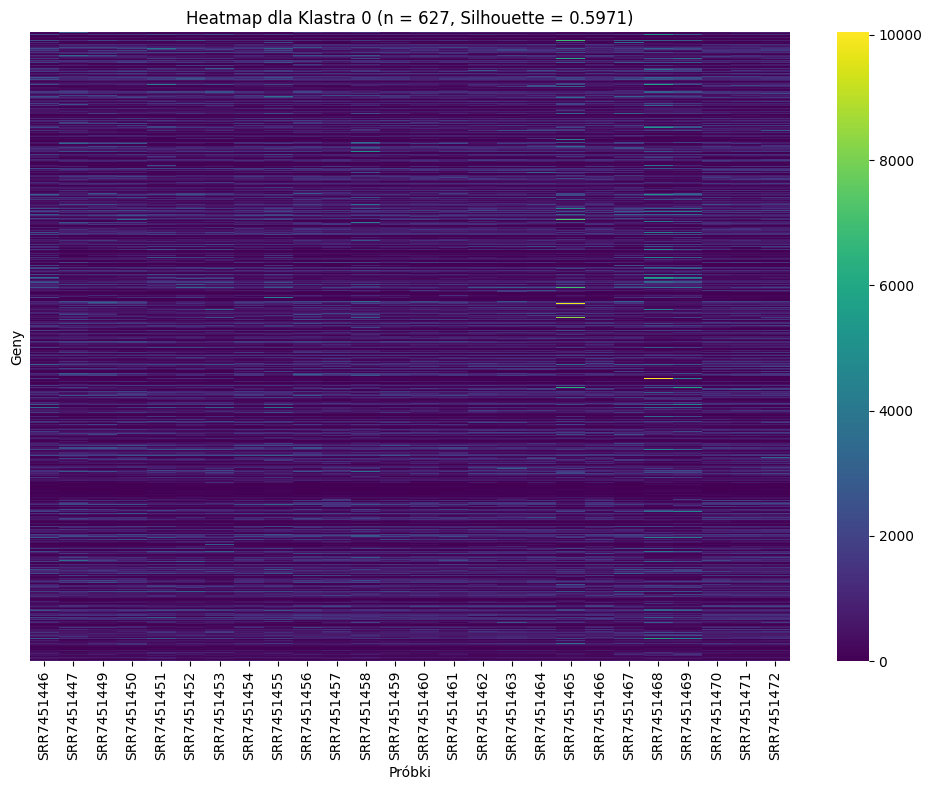

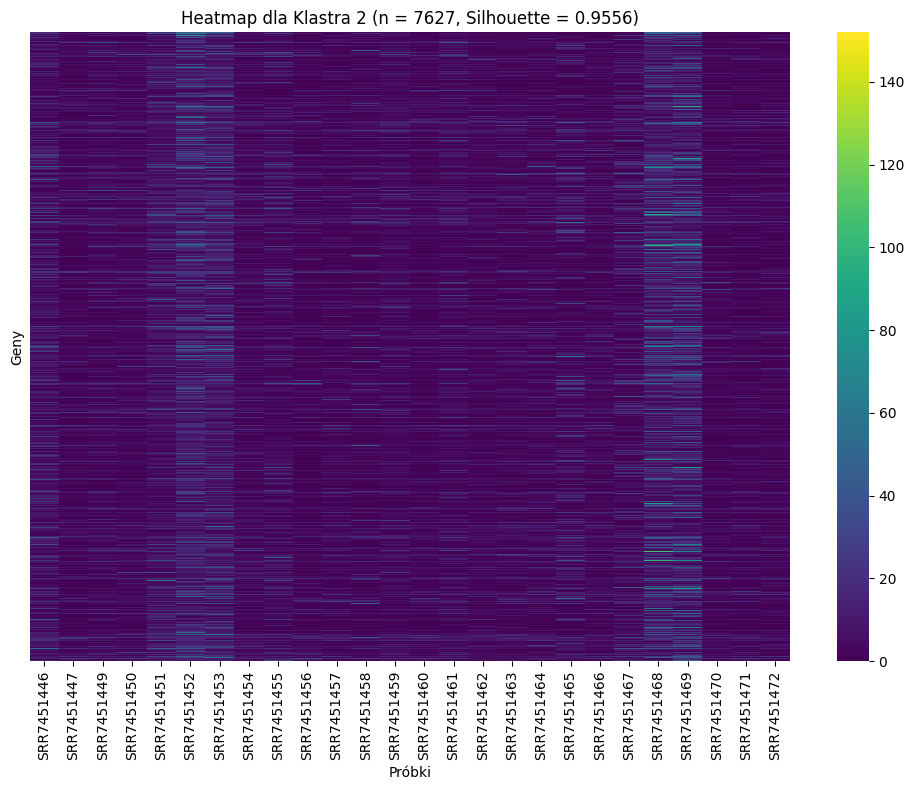

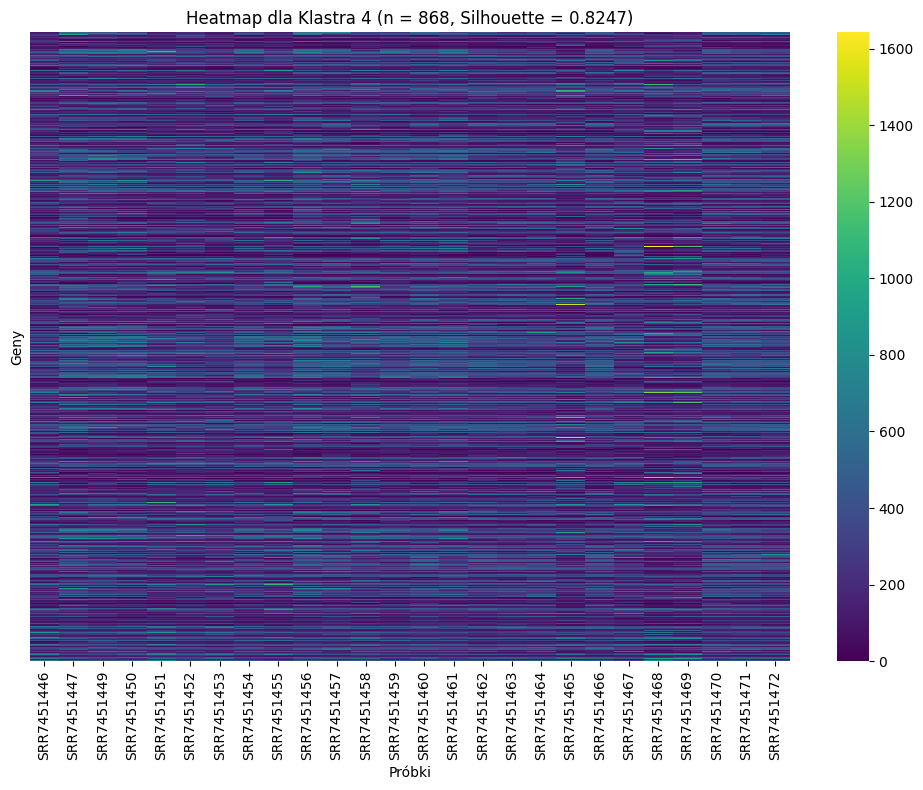

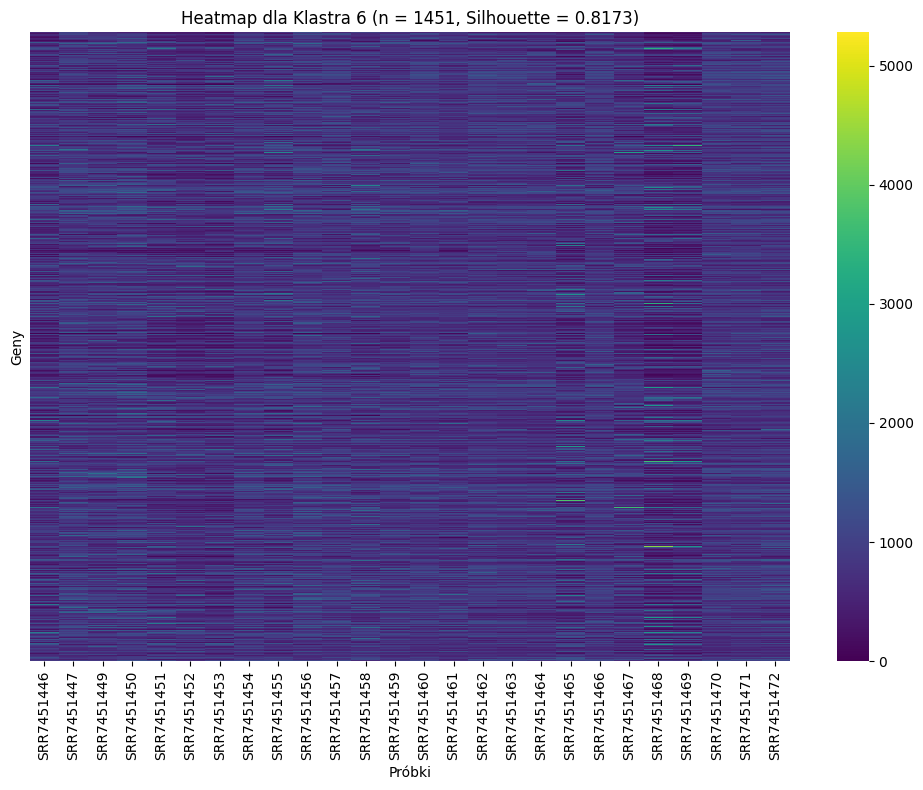

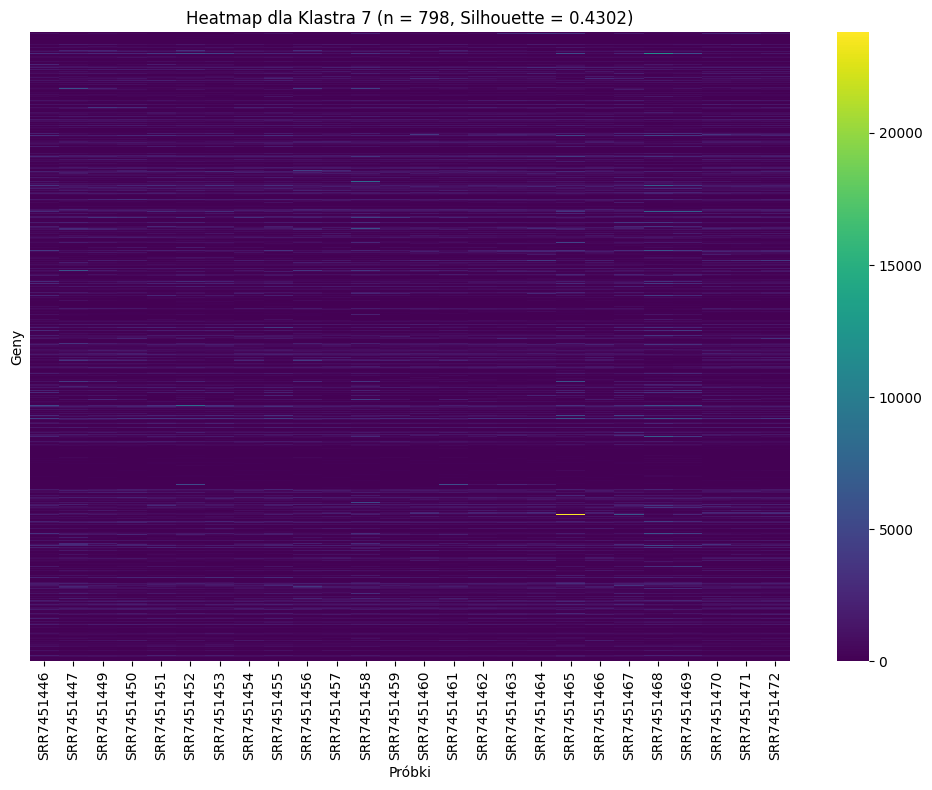

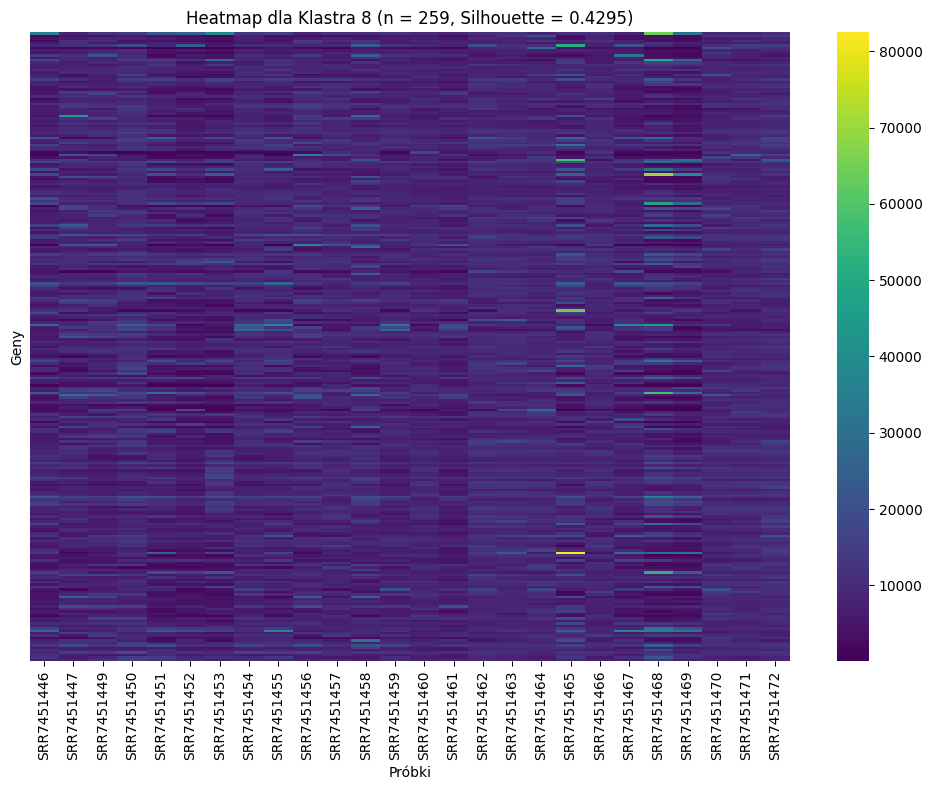

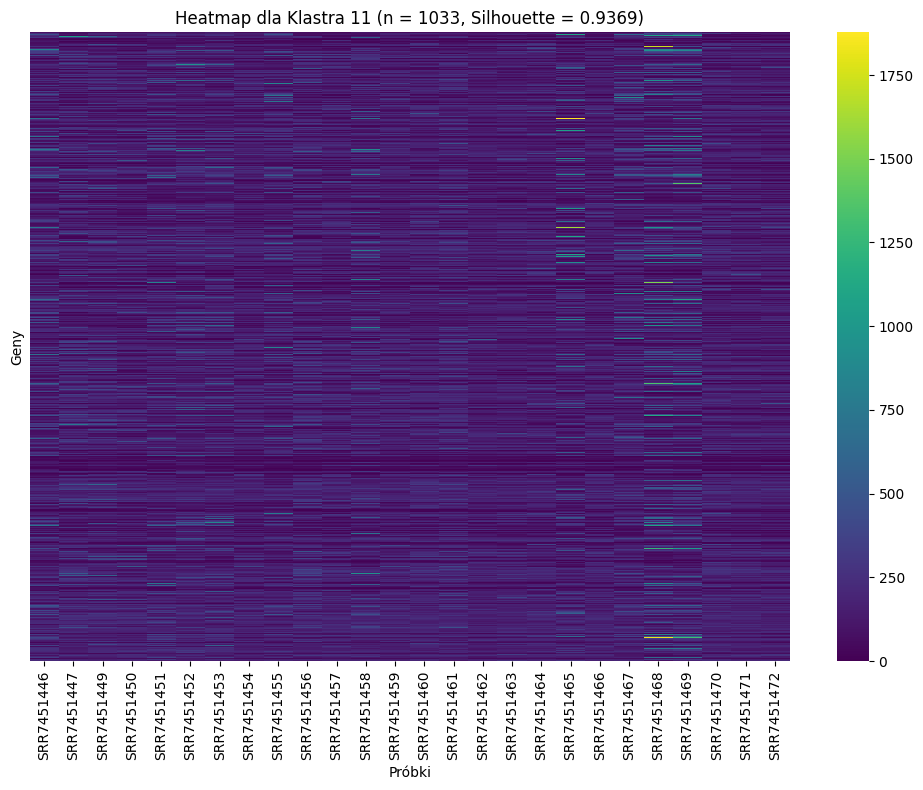

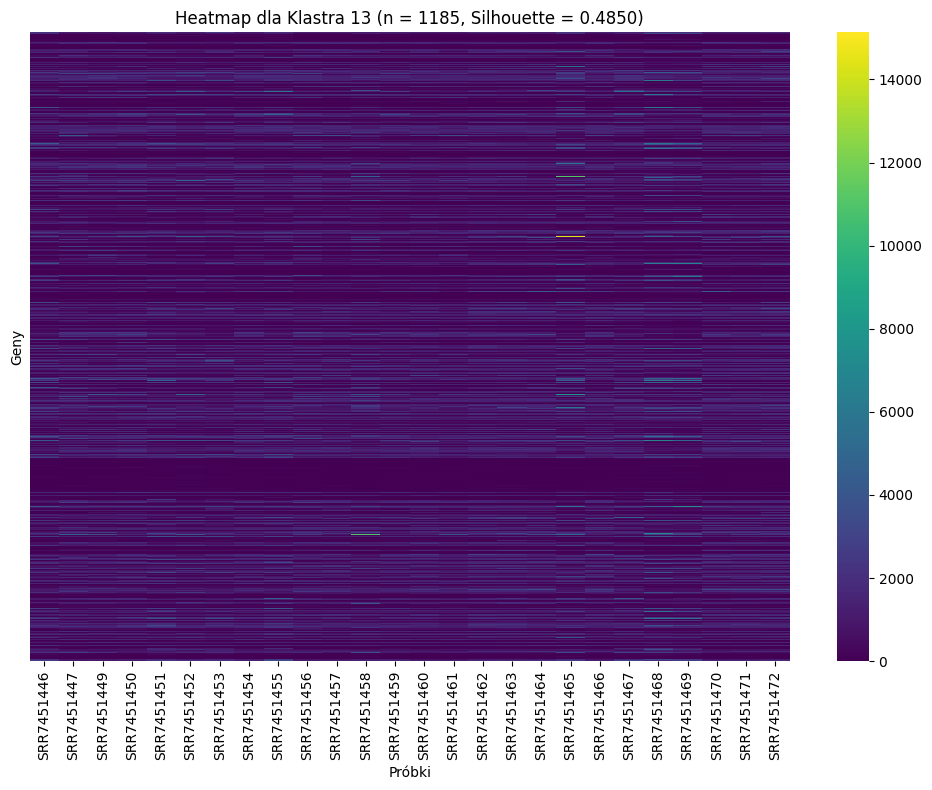

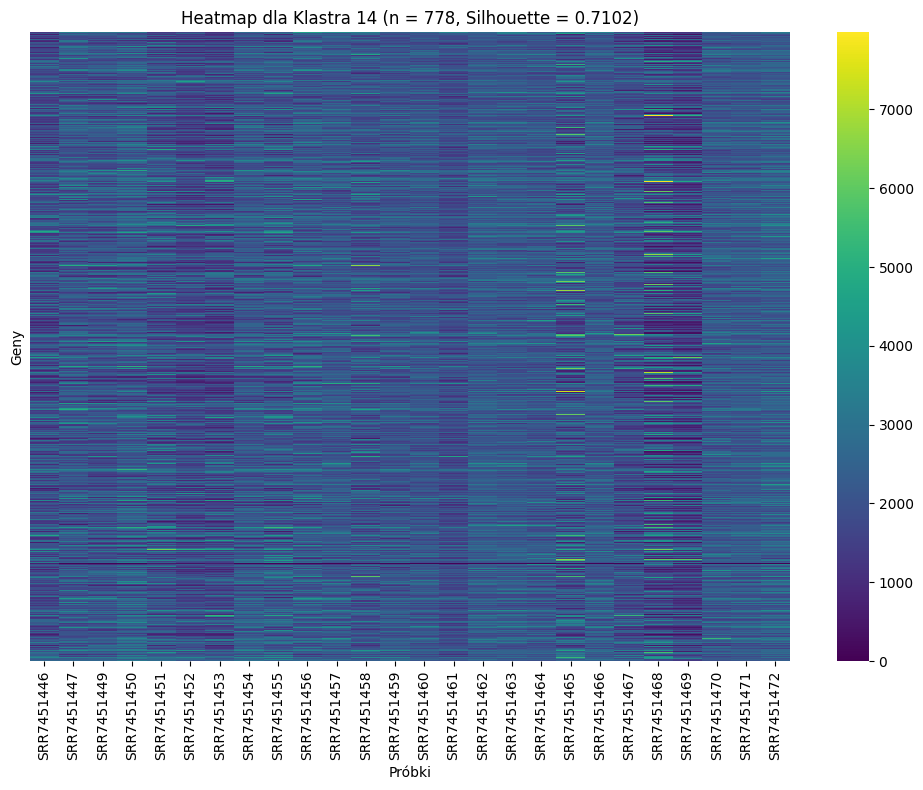

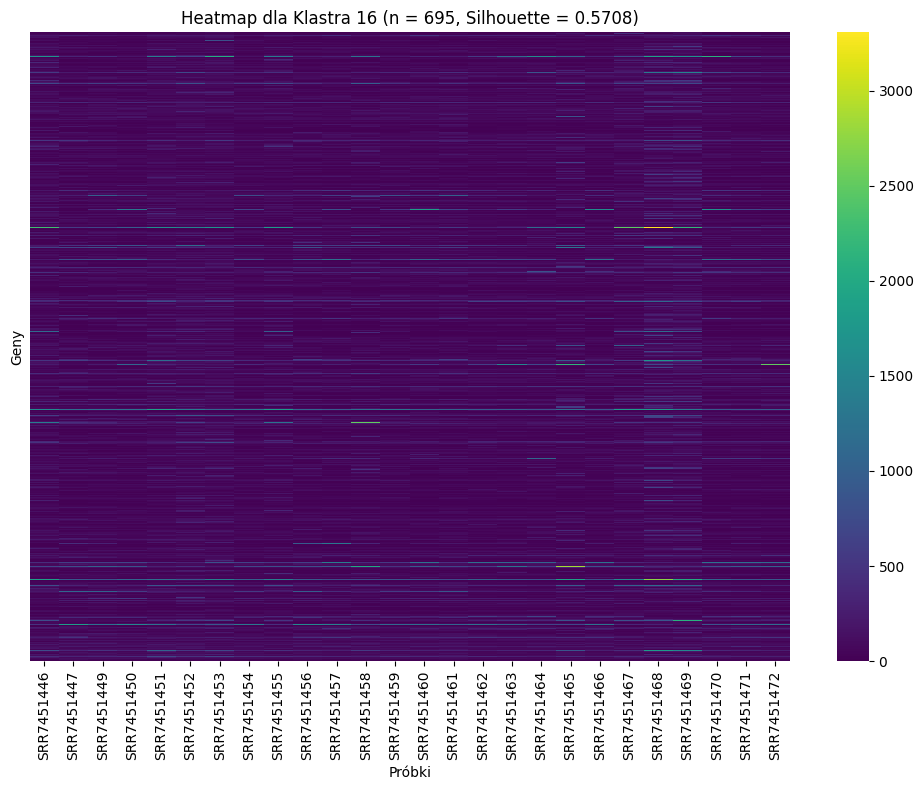

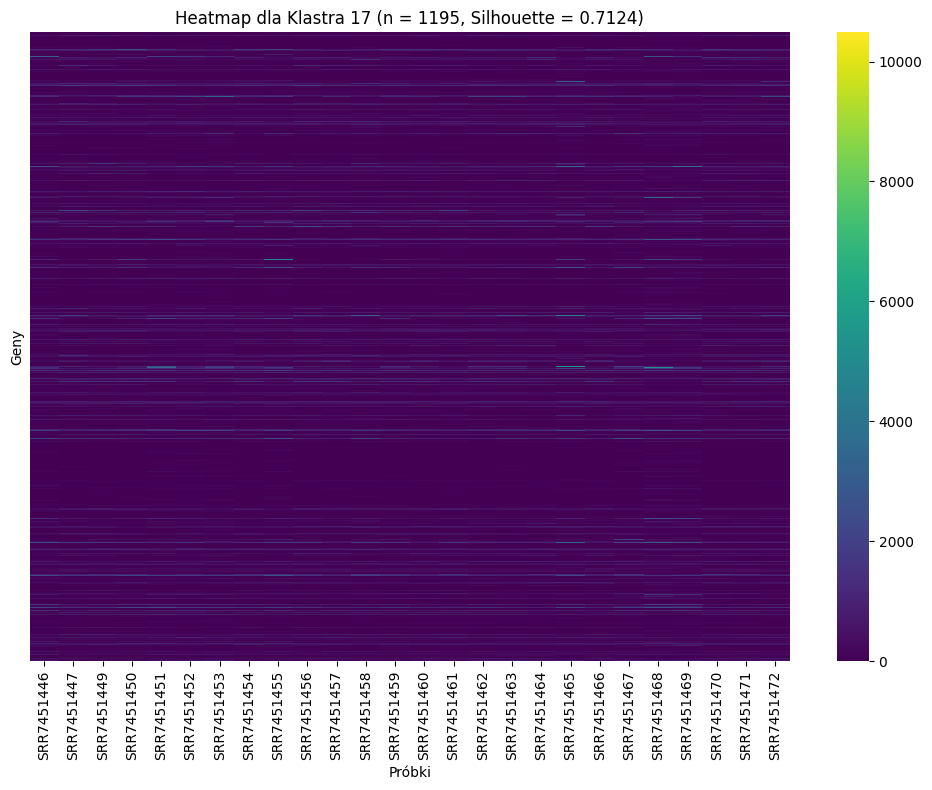

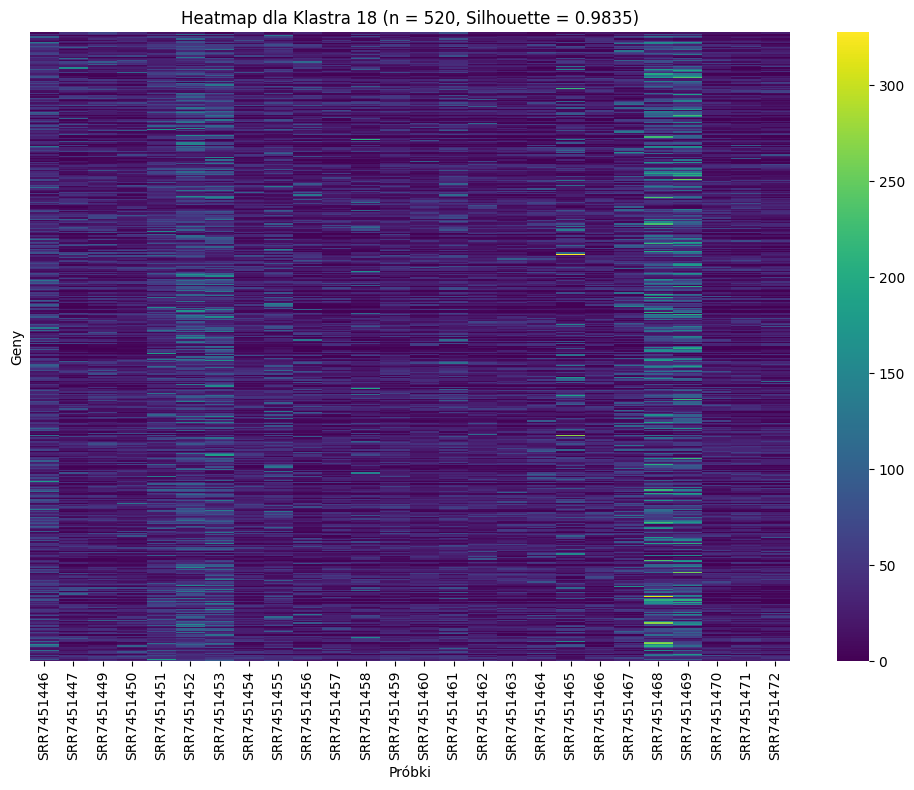

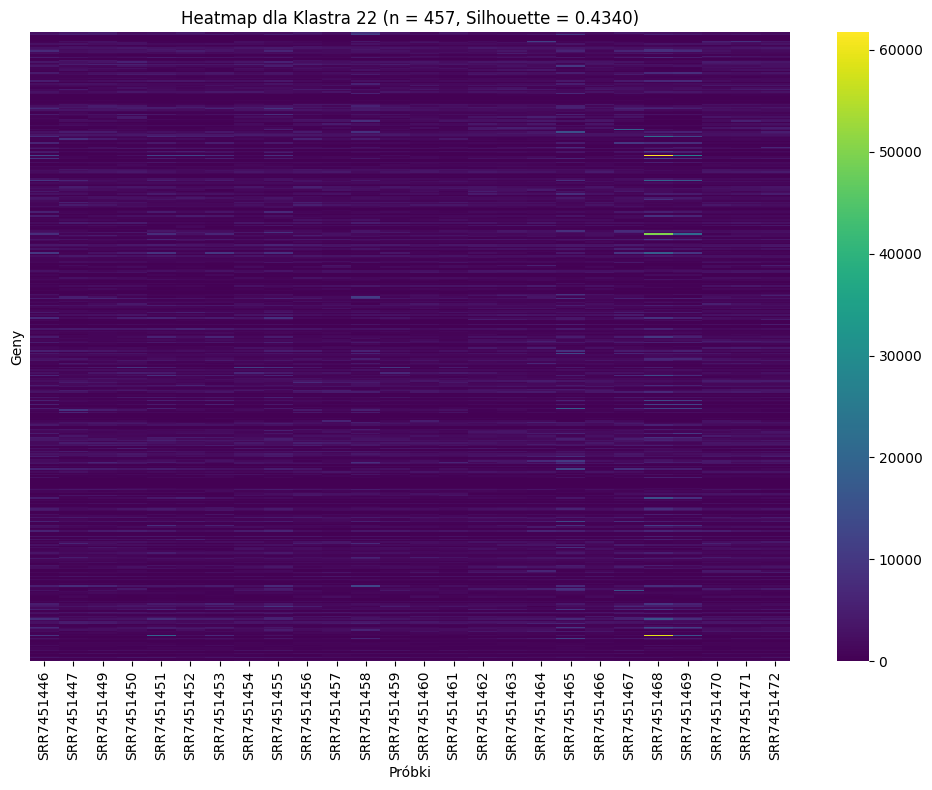

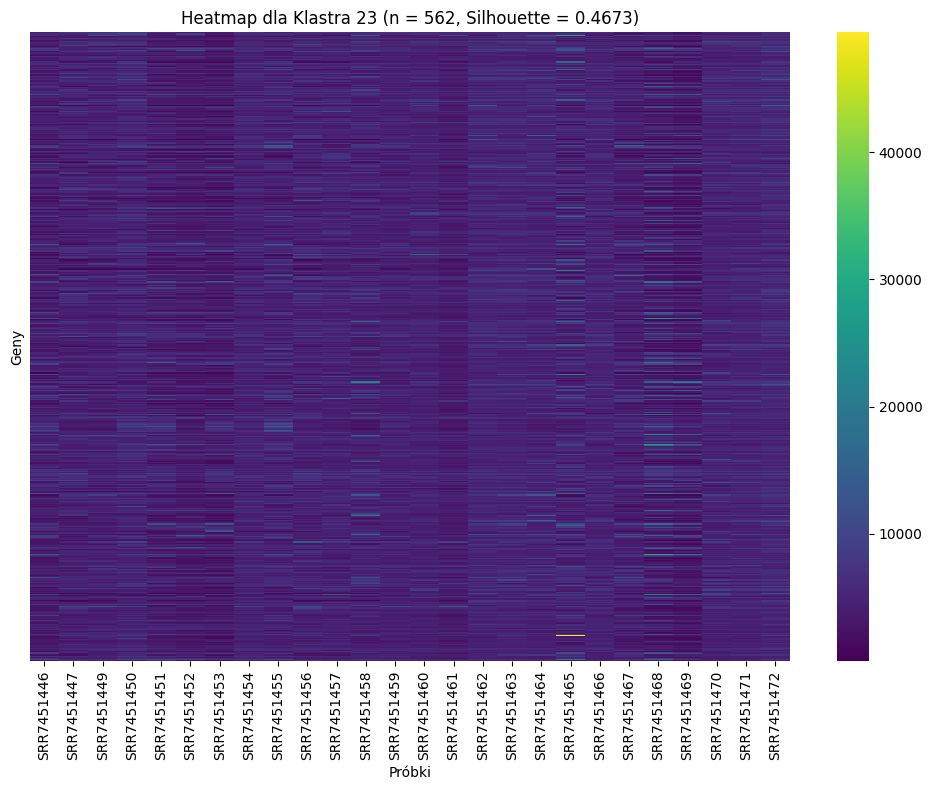

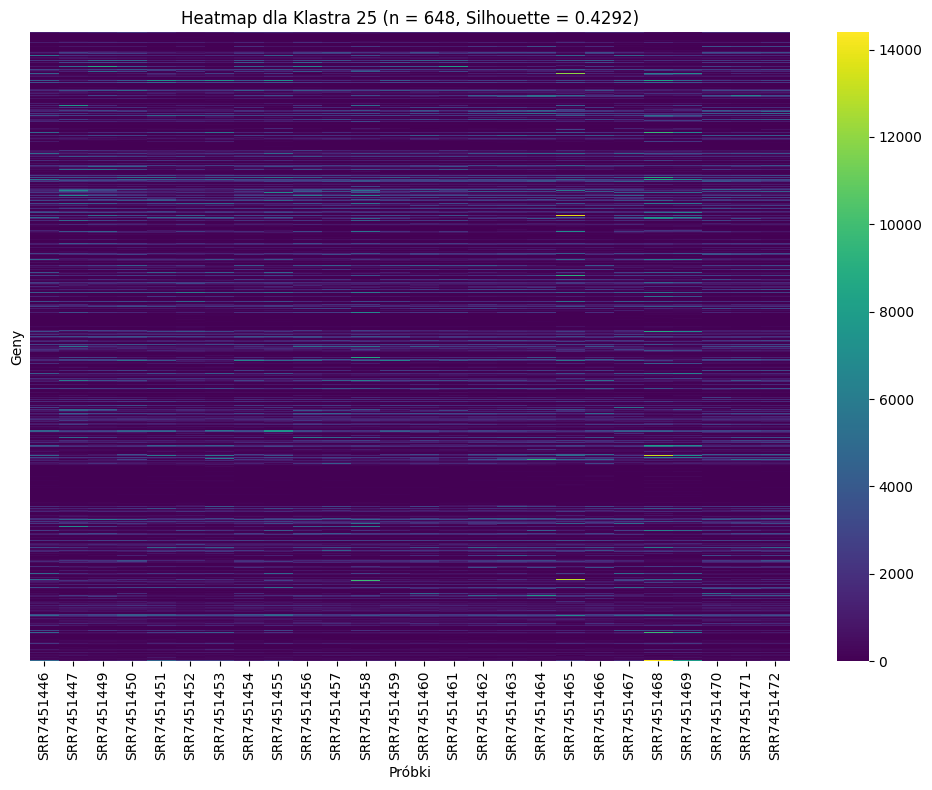

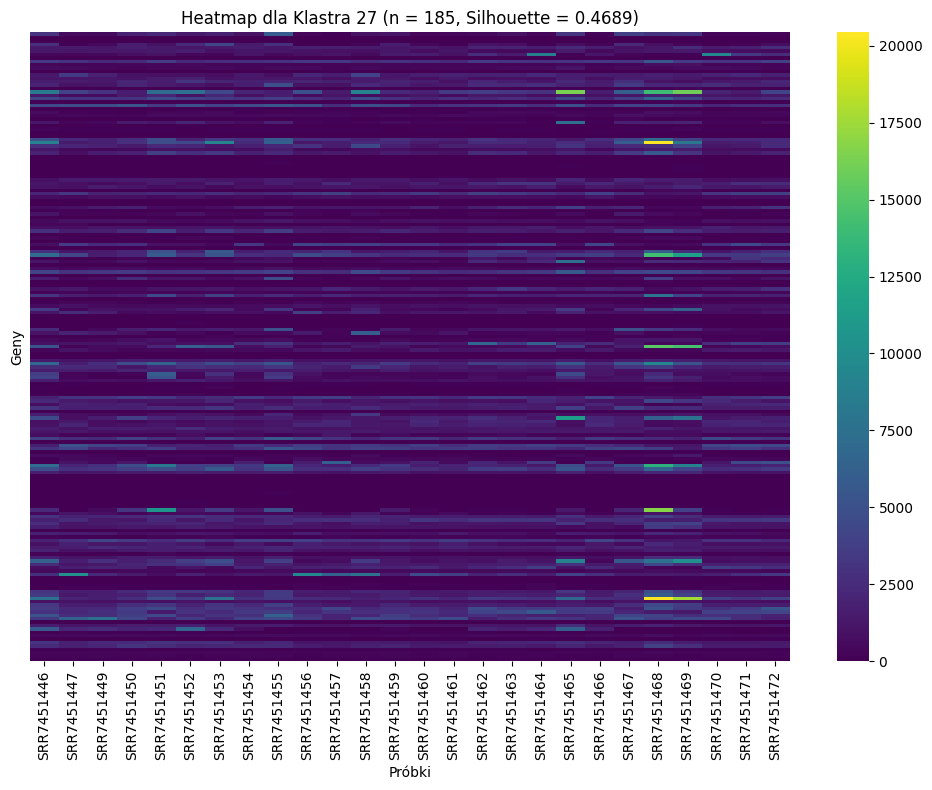

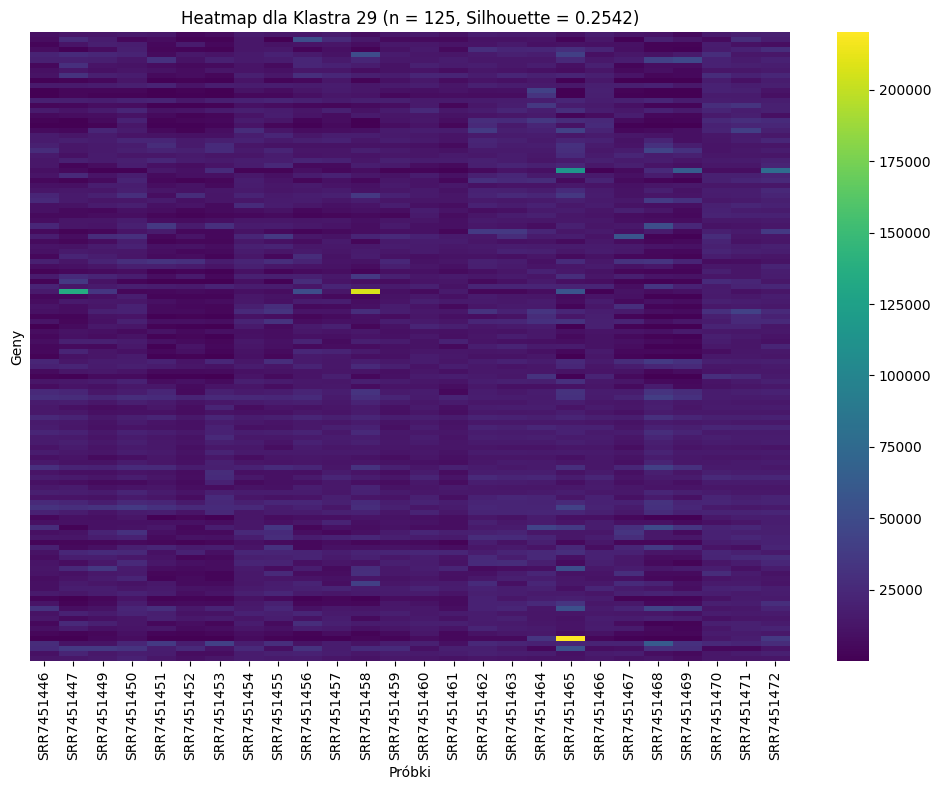

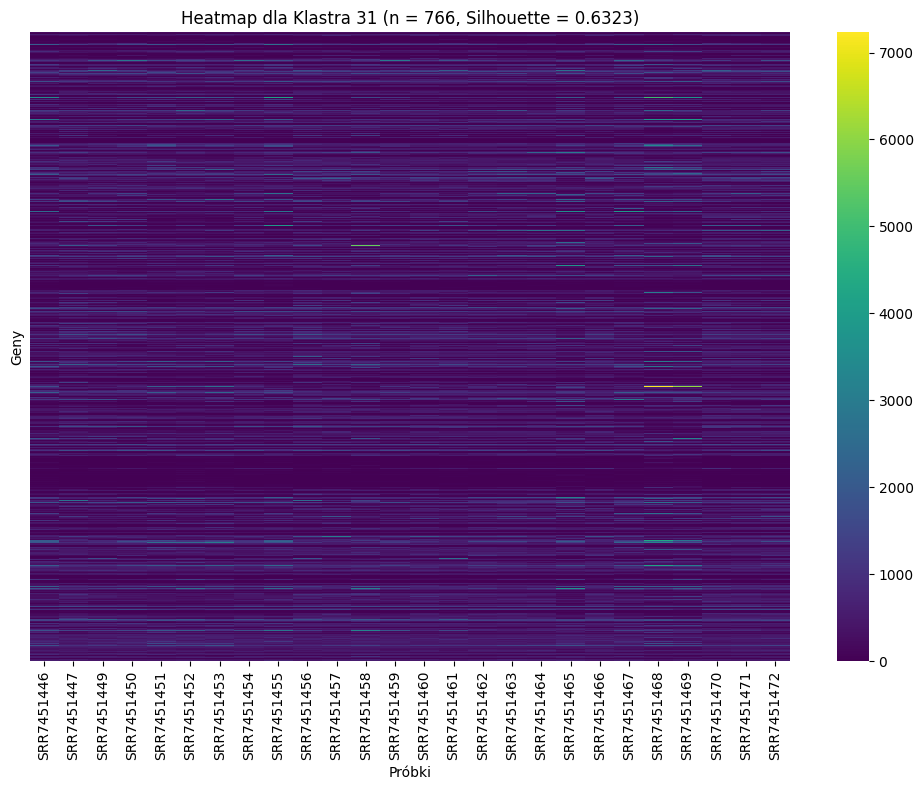

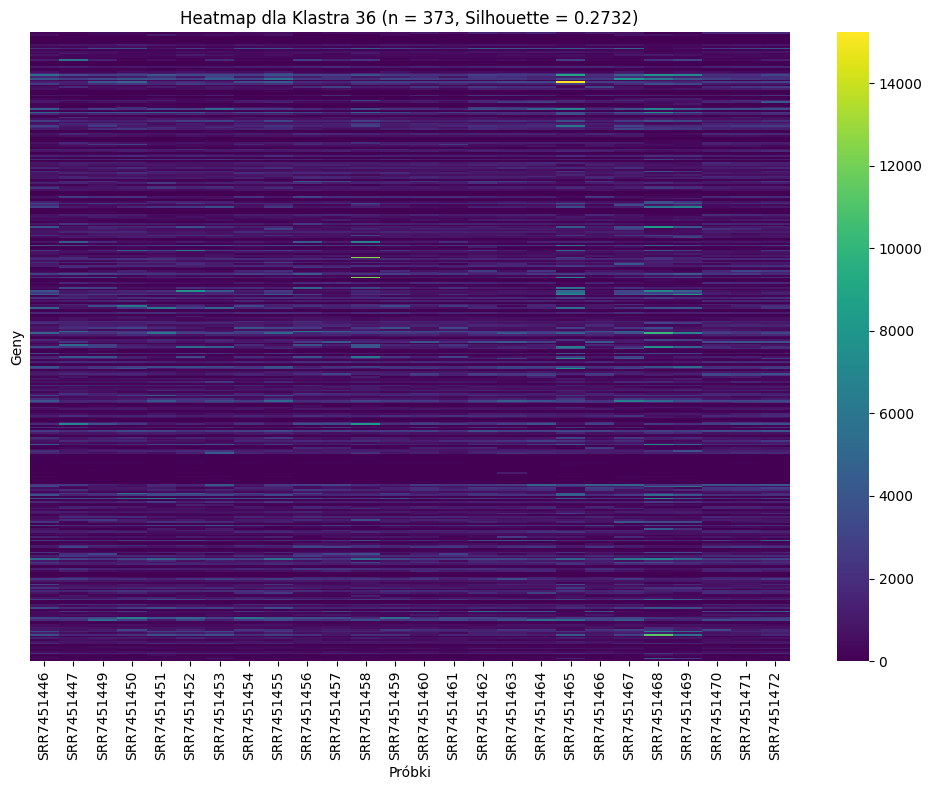

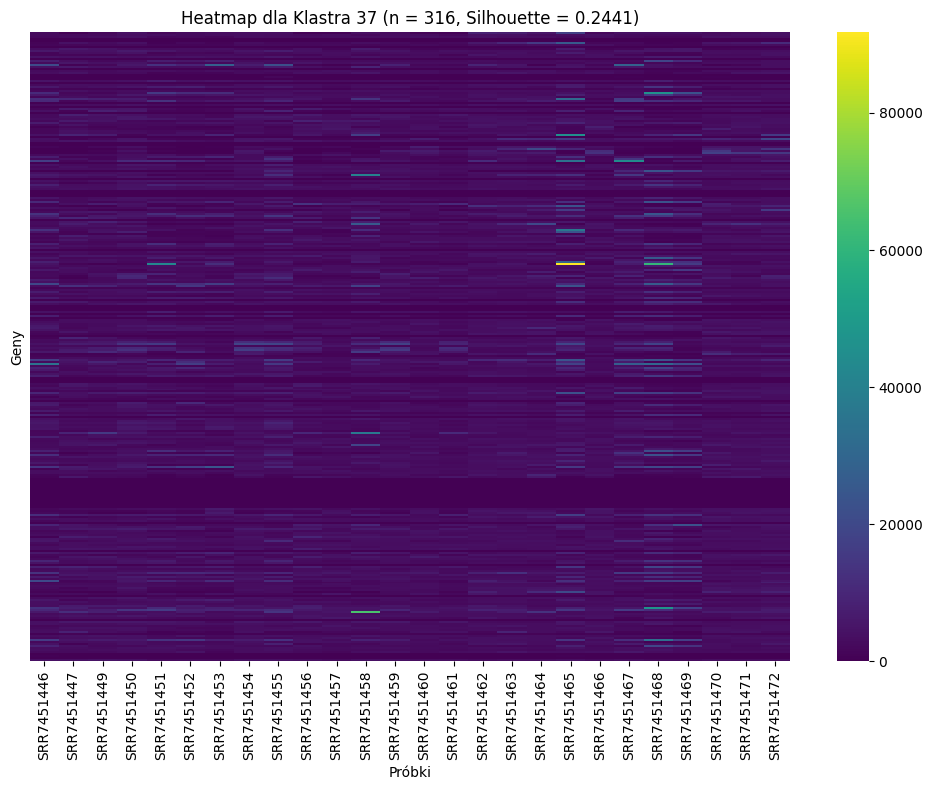

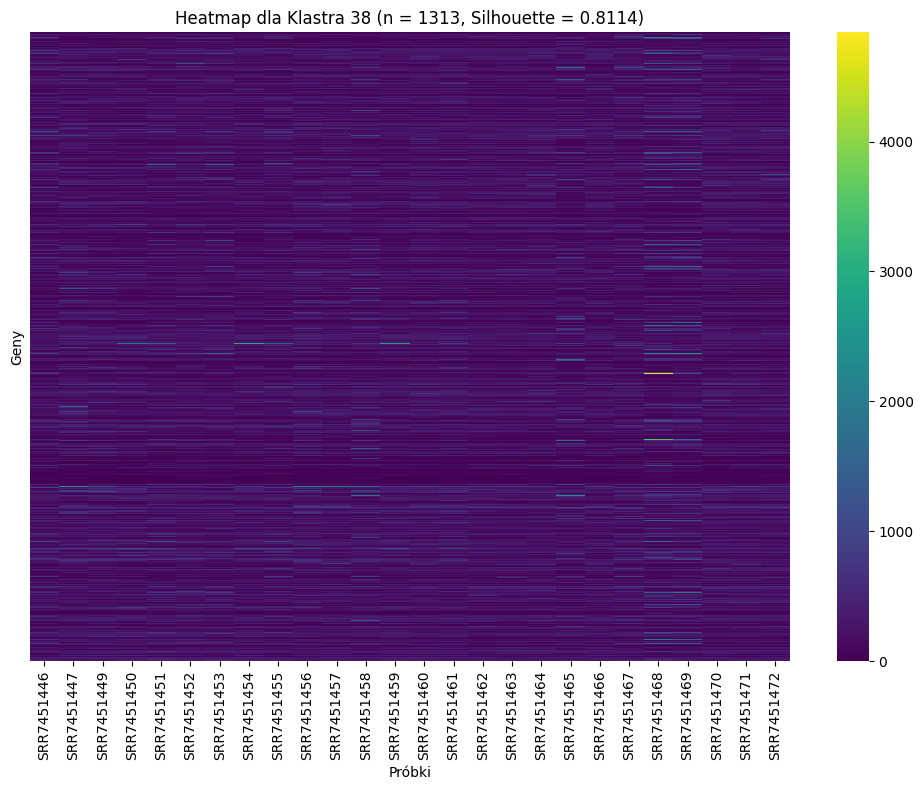

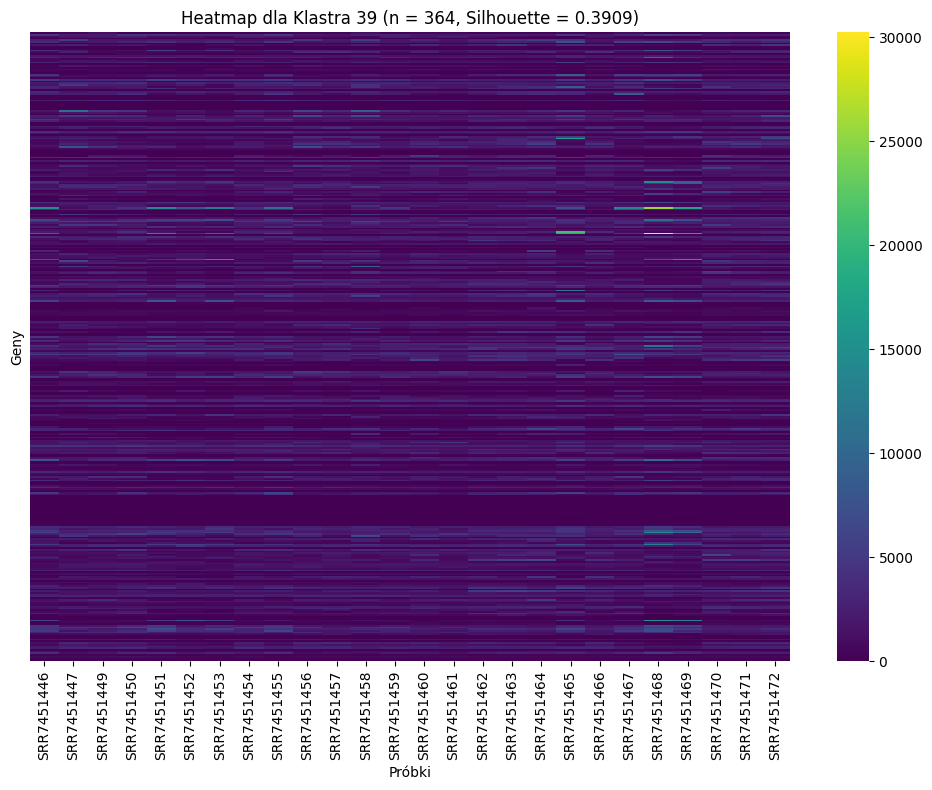

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


n_clusters_to_visualize = 40
min_genes = 50


for cluster_id in range(n_clusters_to_visualize):
    cluster_genes = df_filtered[df_filtered[f'Cluster_{n_clusters_to_visualize}'] == cluster_id]

    if len(cluster_genes) > min_genes:
        heatmap_data = cluster_genes.loc[:, 'SRR7451446':'SRR7451472']
        cluster_silhouette_mean = cluster_genes['Silhouette'].mean()

        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, cmap="viridis", cbar=True, yticklabels=False)

        plt.title(f"Heatmap dla Klastra {cluster_id} (n = {len(cluster_genes)}, Silhouette = {cluster_silhouette_mean:.4f})")
        plt.xlabel("Próbki")
        plt.ylabel("Geny")
        plt.tight_layout()
        plt.show()


In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering_50 = AgglomerativeClustering(n_clusters=50)
agg_labels_50 = agg_clustering_50.fit_predict(data_normalized)

df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50

agg_silhouette_avg_50 = silhouette_score(data_normalized, agg_labels_50)
print(f"Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): {agg_silhouette_avg_50:.4f}")

agg_cluster_counts_50 = pd.Series(agg_labels_50).value_counts()
print(f"Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):")
print(agg_cluster_counts_50)


agg_silhouette_values_50 = silhouette_samples(data_normalized, agg_labels_50)
agg_cluster_silhouettes_50 = pd.DataFrame({
    'Cluster': agg_labels_50,
    'Silhouette': agg_silhouette_values_50
}).groupby('Cluster')['Silhouette'].mean()

print("Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):")
print(agg_cluster_silhouettes_50)

<ipython-input-27-baf6710b0c82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Agg_Cluster_50'] = agg_labels_50


Średni wskaźnik Silhouette dla Agglomerative Clustering (50 klastrów): 0.7372
Ilość genów w każdym klastrze dla Agglomerative Clustering (50 klastrów):
19    7573
17    1458
3     1397
5     1058
28    1034
42     842
26     800
35     723
14     715
2      701
20     688
48     577
10     574
18     543
29     516
0      432
4      410
6      398
49     286
25     259
46     225
9      218
40     213
8      207
38     173
1      125
24      35
13      16
16      10
11       8
7        5
22       4
34       4
23       3
12       2
47       1
43       1
37       1
30       1
45       1
41       1
44       1
27       1
15       1
31       1
36       1
33       1
32       1
39       1
21       1
Name: count, dtype: int64
Średni wskaźnik Silhouette dla każdego klastra w Agglomerative Clustering (50 klastrów):
Cluster
0     0.315819
1     0.225131
2     0.159911
3     0.591726
4     0.253084
5     0.719679
6     0.010275
7     0.254903
8     0.066098
9     0.430736
10    0.413142
11    0.08

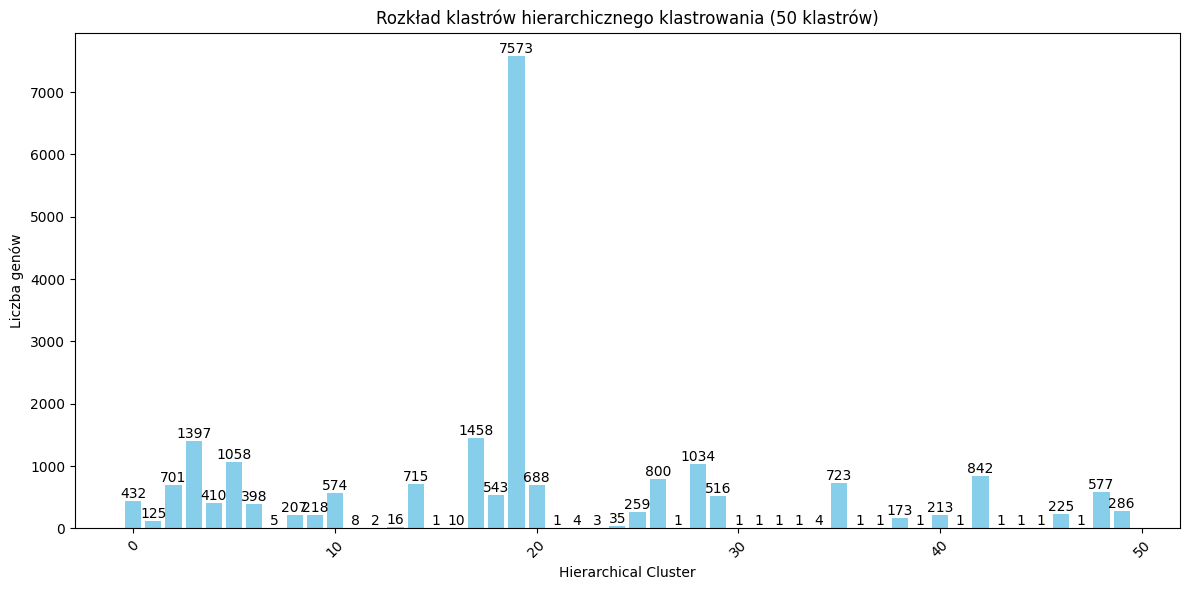

In [30]:
import matplotlib.pyplot as plt


agg_cluster_counts_50 = df_filtered['Agg_Cluster_50'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(agg_cluster_counts_50.index, agg_cluster_counts_50.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Rozkład klastrów hierarchicznego klastrowania (50 klastrów)')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
hierarchical_results = df_filtered[['Unnamed: 0', 'Agg_Cluster_50']].rename(columns={'Unnamed: 0': 'Gene'})
hierarchical_results.to_csv("hierarchical_clustering_results.csv", index=False)

print("Wyniki hierarchicznego klastrowania zapisane do pliku 'hierarchical_clustering_results.csv'.")

Wyniki hierarchicznego klastrowania zapisane do pliku 'hierarchical_clustering_results.csv'.


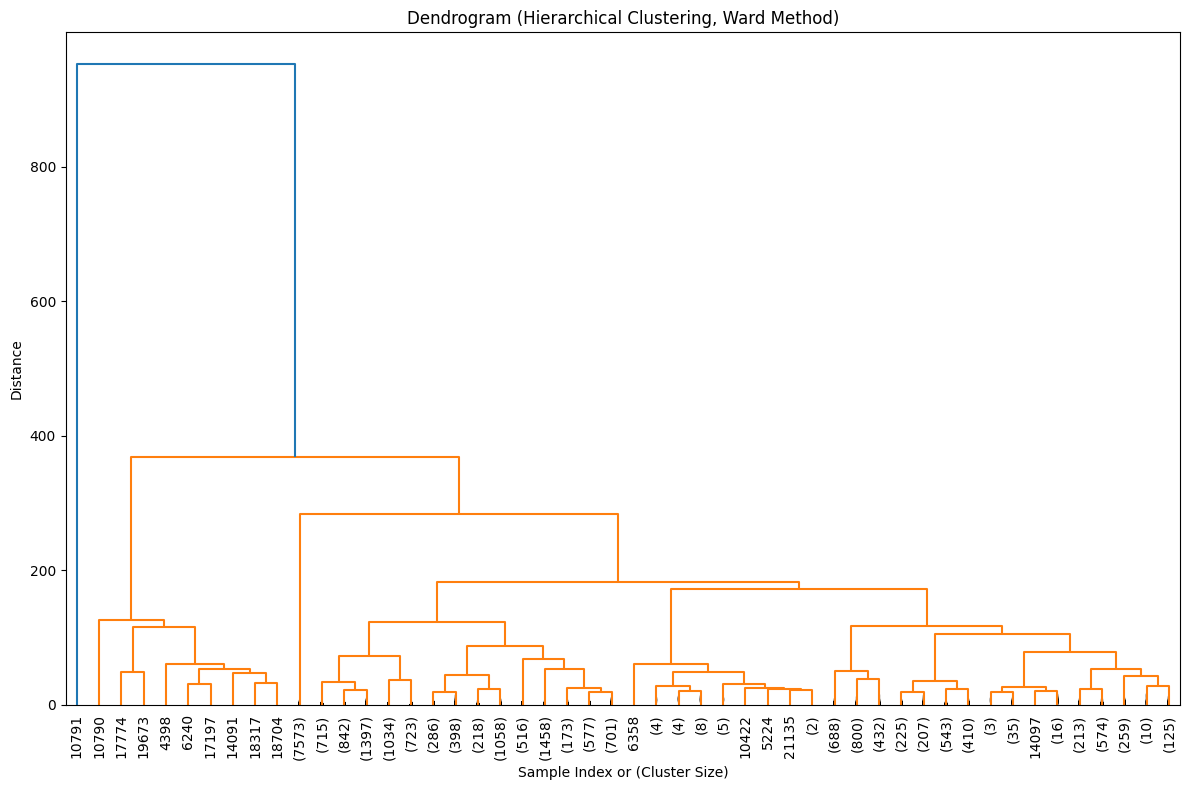

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data_normalized, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram (Hierarchical Clustering, Ward Method)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()




In [33]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_clustering.fit_predict(data_normalized)

df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels

dbscan_cluster_counts = pd.Series(dbscan_labels).value_counts()
print(f"Ilość genów w każdym klastrze dla DBSCAN:")
print(dbscan_cluster_counts)

if len(set(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette_avg = silhouette_score(data_normalized, dbscan_labels)
    print(f"Średni wskaźnik Silhouette dla DBSCAN: {dbscan_silhouette_avg:.4f}")
else:
    print("Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).")


Ilość genów w każdym klastrze dla DBSCAN:
 0     7791
 3     1480
 1     1267
 8     1115
 4     1057
 7     1034
 14     883
 10     843
 9      838
 5      806
 12     796
-1      693
 11     667
 19     516
 15     470
 23     425
 13     273
 20     253
 17     159
 16     154
 2      146
 6      136
 24      89
 18      79
 27      77
 26      74
 28      52
 21      36
 22      22
 25      16
Name: count, dtype: int64
Nie można obliczyć wskaźnika Silhouette dla DBSCAN (za mało klastrów lub obecność outlierów).


<ipython-input-33-bbbb4f961d23>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'DBSCAN_Cluster'] = dbscan_labels


<ipython-input-34-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'PCA{i+1}'] = pca_result[:, i]
<ipython-input-34-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'PCA{i+1}'] = pca_result[:, i]
<ipython-input-34-ef5eb1800f49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

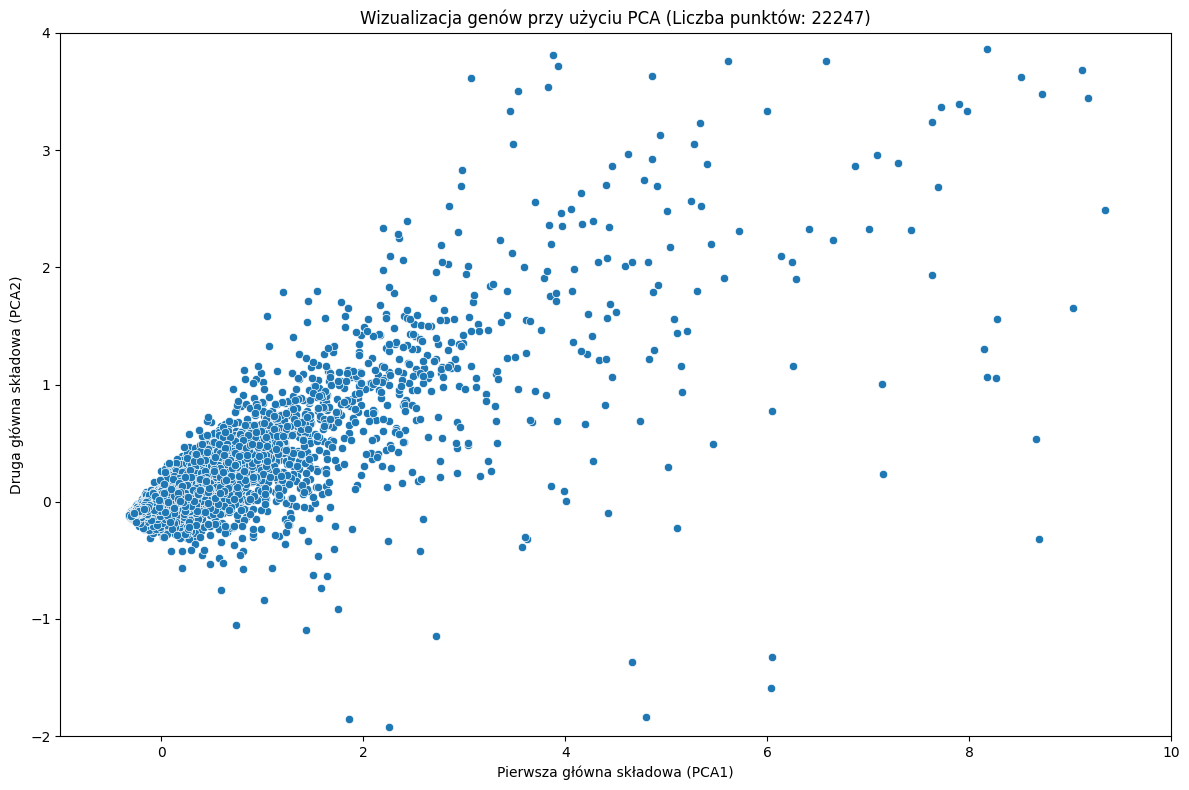

  Principal Component  Explained Variance Ratio
0                PCA1                  0.920489
1                PCA2                  0.060640
2                PCA3                  0.006992
3                PCA4                  0.003096
4                PCA5                  0.002205
5                PCA6                  0.001337
6                PCA7                  0.001137
7                PCA8                  0.000772
8                PCA9                  0.000544
9               PCA10                  0.000523
Całkowita wyjaśniona wariancja przez 10 głównych składowych: 99.77%
Liczba punktów na wykresie: 22247


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

data_values = df_filtered.loc[:, 'SRR7451446':'SRR7451472']
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_values)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(data_normalized)


for i in range(10):
    df_filtered[f'PCA{i+1}'] = pca_result[:, i]

num_points = len(df_filtered)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', data=df_filtered,
    #hue=f'Cluster_{n_clusters_40}', palette='viridis',
    legend=None
)


plt.xlim(-1, 10)
plt.ylim(-2, 4)

plt.title(f"Wizualizacja genów przy użyciu PCA (Liczba punktów: {num_points})")
plt.xlabel("Pierwsza główna składowa (PCA1)")
plt.ylabel("Druga główna składowa (PCA2)")
plt.tight_layout()
plt.show()

explained_variance = pd.DataFrame({
    'Principal Component': [f'PCA{i+1}' for i in range(10)],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
print(explained_variance)

total_explained_variance = sum(pca.explained_variance_ratio_)
print(f"Całkowita wyjaśniona wariancja przez 10 głównych składowych: {total_explained_variance:.2%}")
print(f"Liczba punktów na wykresie: {num_points}")


In [38]:

kmeans_file_path = 'kmeans_40_clusters.csv'
wgcna_file_path = 'modules_and_genes.csv'


kmeans_data = pd.read_csv(kmeans_file_path)
wgcna_data = pd.read_csv(wgcna_file_path)


kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
wgcna_data.rename(columns={'Gene': 'Gene'}, inplace=True)


merged_kmeans_wgcna = pd.merge(kmeans_data, wgcna_data, on='Gene')


print("Połączone dane (merged_kmeans_wgcna):")
print(merged_kmeans_wgcna.head())

kmeans_clusters = merged_kmeans_wgcna.groupby('Cluster_40')['Gene'].apply(set)
wgcna_clusters = merged_kmeans_wgcna.groupby('Module')['Gene'].apply(set)


kmeans_cluster_sizes = merged_kmeans_wgcna.groupby('Cluster_40')['Gene'].count()
wgcna_cluster_sizes = merged_kmeans_wgcna.groupby('Module')['Gene'].count()


overlap_matrix = pd.DataFrame(index=kmeans_clusters.index, columns=wgcna_clusters.index)

for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
    for wgcna_cluster, wgcna_genes in wgcna_clusters.items():
        overlap_matrix.loc[kmeans_cluster, wgcna_cluster] = len(kmeans_genes & wgcna_genes)

overlap_matrix = overlap_matrix.fillna(0).infer_objects().astype(int)


best_matches = overlap_matrix.idxmax(axis=1)
max_overlap = overlap_matrix.max(axis=1)


best_matches_df = pd.DataFrame({
    'Cluster_40': best_matches.index,
    'K-means Cluster Size': best_matches.index.map(kmeans_cluster_sizes),
    'Best WGCNA Module': best_matches.values,
    'WGCNA Module Size': [wgcna_cluster_sizes[module] for module in best_matches.values],
    'Common Genes': max_overlap.values
})

best_matches_df = best_matches_df.sort_values(by='Common Genes', ascending=False)


print("\nNajlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):")
for _, row in best_matches_df.iterrows():
    print(f"K-means Cluster {row['Cluster_40']} ({row['K-means Cluster Size']} genów) "
          f"najlepiej dopasowany do WGCNA Module {row['Best WGCNA Module']} "
          f"({row['WGCNA Module Size']} genów) ({row['Common Genes']} wspólnych genów)")


from sklearn.metrics import adjusted_rand_score

ari_kmeans_wgcna = adjusted_rand_score(
    merged_kmeans_wgcna['Cluster_40'],
    merged_kmeans_wgcna['Module']
)
print(f"Adjusted Rand Index (ARI) między K-means a WGCNA: {ari_kmeans_wgcna:.4f}")


best_matches_df.to_csv("best_matches_kmeans_wgcna_with_sizes.csv", index=False)
print("\nWyniki zapisane do pliku 'best_matches_kmeans_wgcna_with_sizes.csv'.")


Połączone dane (merged_kmeans_wgcna):
      Gene  Cluster_40  Module
0      7SK           2       1
1      A2M          38      24
2  A2M-AS1           2       0
3    A2ML1           2       1
4   A4GALT          36       2

Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):
K-means Cluster 2 (7627 genów) najlepiej dopasowany do WGCNA Module 1 (7615 genów) (4330 wspólnych genów)
K-means Cluster 6 (1451 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (590 wspólnych genów)
K-means Cluster 38 (1313 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (512 wspólnych genów)
K-means Cluster 17 (1195 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (479 wspólnych genów)
K-means Cluster 11 (1033 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (446 wspólnych genów)
K-means Cluster 13 (1185 genów) najlepiej dopasowany do WGCNA Module 0 (8172 genów) (439 wspólnych genów)
K-means Cluster 4 (868 genów) najlepiej dopasowany do WGCNA Module

<ipython-input-38-766e20abe320>:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  overlap_matrix = overlap_matrix.fillna(0).infer_objects().astype(int)


In [62]:
report_filename = "raportkmeanswgcna.txt"
with open(report_filename, "w") as report_file:
    report_file.write("Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):\n")
    for _, row in best_matches_df.iterrows():
        line = (f"K-means Cluster {row['Cluster_40']} ({row['K-means Cluster Size']} genów) "
                f"najlepiej dopasowany do WGCNA Module {row['Best WGCNA Module']} "
                f"({row['WGCNA Module Size']} genów) ({row['Common Genes']} wspólnych genów)\n")
        report_file.write(line)

print(f"Raport zapisano do pliku: {report_filename}")


Raport zapisano do pliku: raportkmeanswgcna.txt


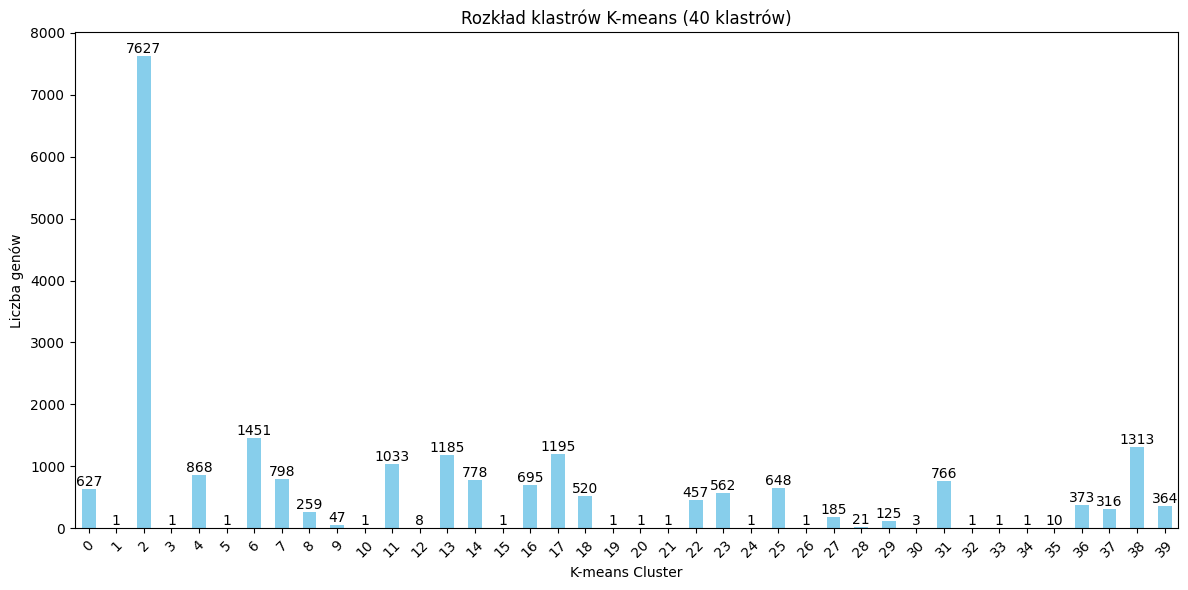

In [39]:
import matplotlib.pyplot as plt

kmeans_cluster_counts = merged_kmeans_wgcna['Cluster_40'].value_counts()

plt.figure(figsize=(12, 6))
bars = kmeans_cluster_counts.sort_index().plot(kind='bar', color='skyblue')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', fontsize=10)

plt.title('Rozkład klastrów K-means (40 klastrów)')
plt.xlabel('K-means Cluster')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


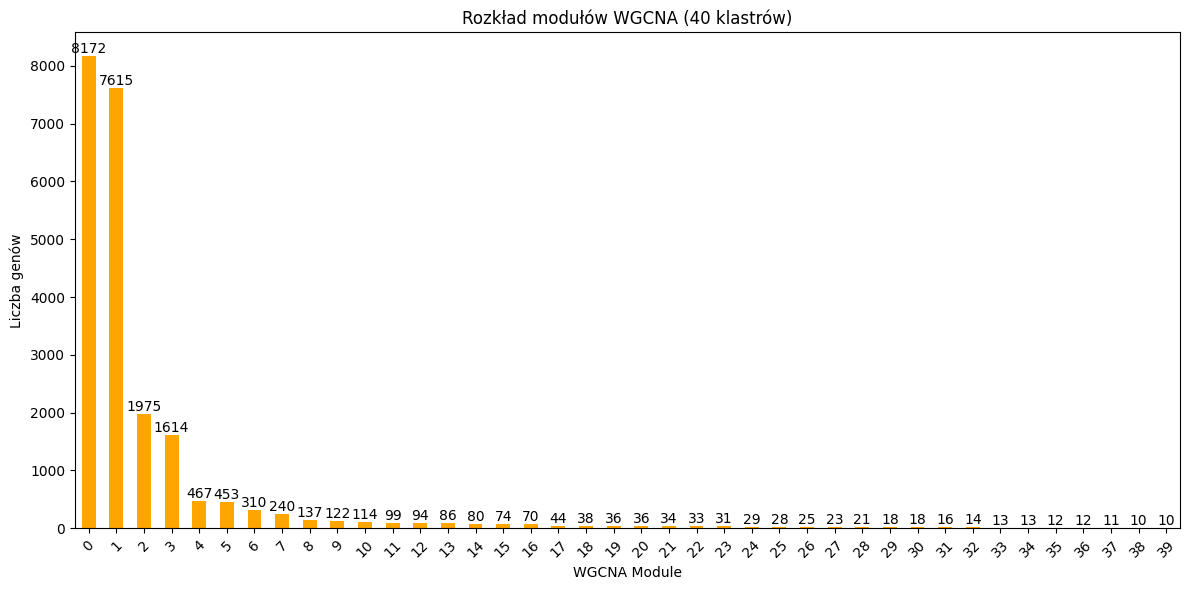

In [40]:

wgcna_module_counts = merged_kmeans_wgcna['Module'].value_counts()


plt.figure(figsize=(12, 6))
bars = wgcna_module_counts.sort_index().plot(kind='bar', color='orange')


for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', label_type='edge', fontsize=10)

plt.title('Rozkład modułów WGCNA (40 klastrów)')
plt.xlabel('WGCNA Module')
plt.ylabel('Liczba genów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


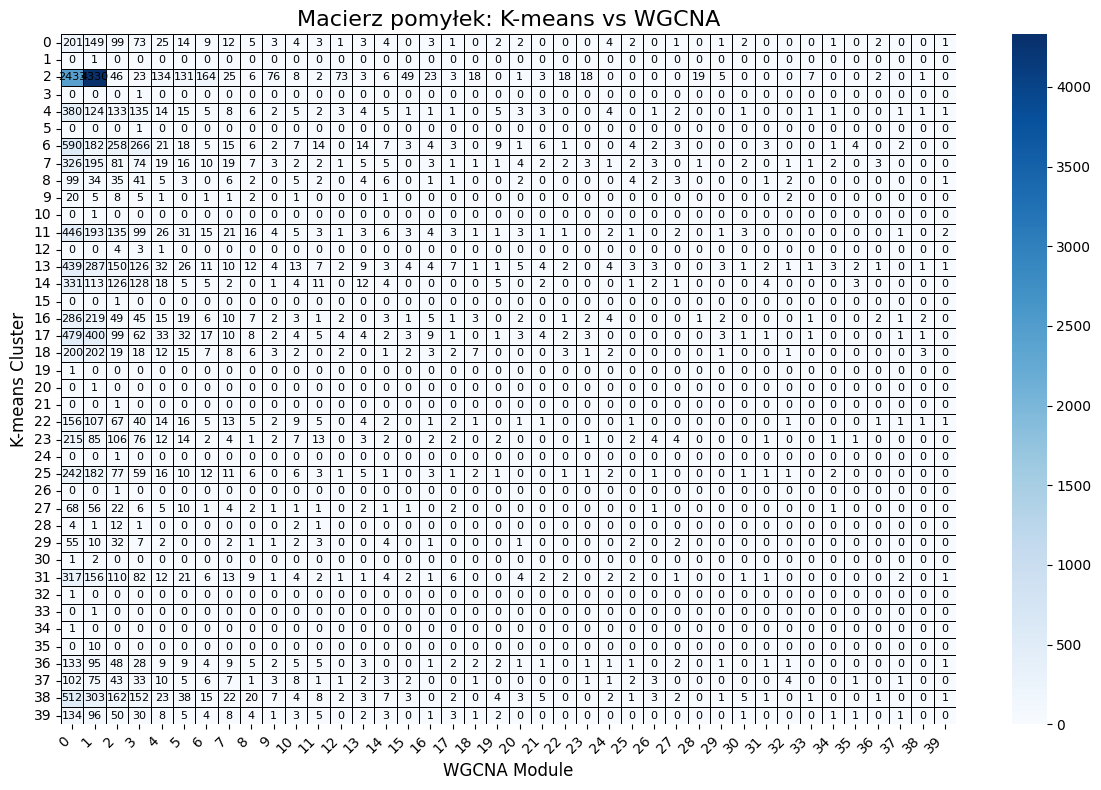

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(merged_kmeans_wgcna['Cluster_40'], merged_kmeans_wgcna['Module'])


plt.figure(figsize=(12, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 8, "color": "black"},
    linecolor='black',
    linewidths=0.5
)
plt.title('Macierz pomyłek: K-means vs WGCNA', fontsize=16)
plt.xlabel('WGCNA Module', fontsize=12)
plt.ylabel('K-means Cluster', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [42]:

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=merged_kmeans_wgcna['Cluster_40'].unique(),
    columns=merged_kmeans_wgcna['Module'].unique()
)

conf_matrix_df = conf_matrix_df.sort_index(axis=0).sort_index(axis=1)


conf_matrix_df.to_csv('confusion_matrix_kmeans_vs_wgcna.csv', index_label='Cluster_40')

print("Macierz pomyłek została zapisana do pliku 'confusion_matrix_kmeans_vs_wgcna.csv'.")


Macierz pomyłek została zapisana do pliku 'confusion_matrix_kmeans_vs_wgcna.csv'.


In [43]:

total_genes = len(merged_kmeans_wgcna)
print(f"Łączna liczba genów biorących udział w porównaniu: {total_genes}")


same_cluster_genes = merged_kmeans_wgcna[merged_kmeans_wgcna['Cluster_40'] == merged_kmeans_wgcna['Module']]
num_same_cluster_genes = len(same_cluster_genes)
print(f"Liczba genów przypisanych do tych samych klastrów w obu metodach: {num_same_cluster_genes}")


same_cluster_genes.to_csv('same_cluster_genes.csv', index=False)
print("Lista genów przypisanych do tych samych klastrów zapisana do pliku 'same_cluster_genes.csv'.")

different_cluster_genes = merged_kmeans_wgcna[merged_kmeans_wgcna['Cluster_40'] != merged_kmeans_wgcna['Module']]
num_different_cluster_genes = len(different_cluster_genes)
print(f"Liczba genów przypisanych do różnych klastrów w obu metodach: {num_different_cluster_genes}")

different_cluster_genes.to_csv('different_cluster_genes.csv', index=False)
print("Lista genów przypisanych do różnych klastrów zapisana do pliku 'different_cluster_genes.csv'.")

common_genes_count = best_matches_df['Common Genes'].sum()
print(f"Liczba wspólnych genów między najlepszymi dopasowanymi klastrami: {common_genes_count}")


Łączna liczba genów biorących udział w porównaniu: 22247
Liczba genów przypisanych do tych samych klastrów w obu metodach: 321
Lista genów przypisanych do tych samych klastrów zapisana do pliku 'same_cluster_genes.csv'.
Liczba genów przypisanych do różnych klastrów w obu metodach: 21926
Lista genów przypisanych do różnych klastrów zapisana do pliku 'different_cluster_genes.csv'.
Liczba wspólnych genów między najlepszymi dopasowanymi klastrami: 10104



Najlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):
K-means Cluster 2 (7627 genów) najlepiej dopasowany do klastra hierarchicznego 19 (7573 genów) (7573 wspólnych genów)
K-means Cluster 6 (1451 genów) najlepiej dopasowany do klastra hierarchicznego 17 (1458 genów) (1451 wspólnych genów)
K-means Cluster 38 (1313 genów) najlepiej dopasowany do klastra hierarchicznego 3 (1397 genów) (1313 wspólnych genów)
K-means Cluster 17 (1195 genów) najlepiej dopasowany do klastra hierarchicznego 5 (1058 genów) (1056 wspólnych genów)
K-means Cluster 11 (1033 genów) najlepiej dopasowany do klastra hierarchicznego 28 (1034 genów) (1033 wspólnych genów)
K-means Cluster 4 (868 genów) najlepiej dopasowany do klastra hierarchicznego 42 (842 genów) (842 wspólnych genów)
K-means Cluster 7 (798 genów) najlepiej dopasowany do klastra hierarchicznego 26 (800 genów) (784 wspólnych genów)
K-means Cluster 14 (778 genów) najlepiej dopasowany do klastra hierarchicznego 35 (723 genów) (723 wspól

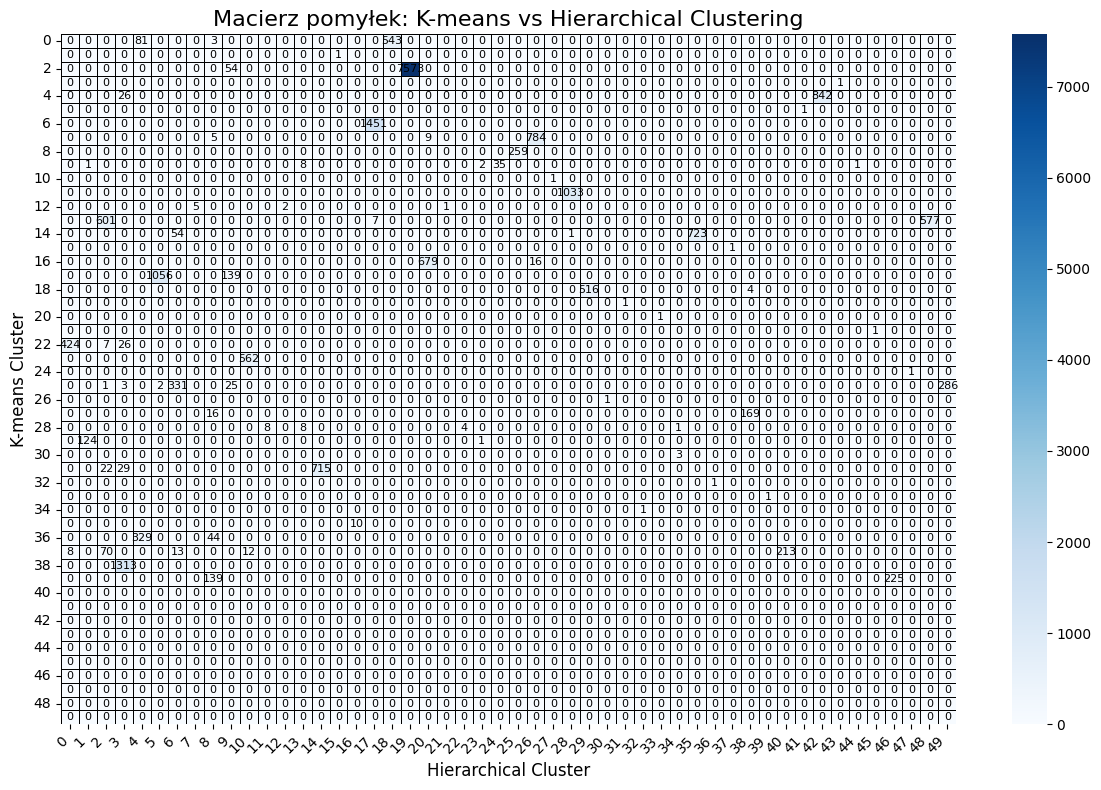


Adjusted Rand Index (ARI): 0.9738622337075147


In [60]:

import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

kmeans_file_path = "kmeans_40_clusters.csv"
hierarchical_file_path = "hierarchical_clustering_results.csv"
kmeans_data = pd.read_csv(kmeans_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)
kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)


merged_kmeans_hierarchical = pd.merge(kmeans_data, hierarchical_data, on='Gene')

def compare_and_report_clusters(df, kmeans_col, hierarchical_col, min_common_genes=5, top_n=None):
    kmeans_clusters = df.groupby(kmeans_col)['Gene'].apply(set)
    hierarchical_clusters = df.groupby(hierarchical_col)['Gene'].apply(set)

    best_matches = []
    reports = []

    for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
        best_match = None
        max_overlap = 0
        best_hierarchical_genes = set()
        matches = []

        for hierarchical_cluster, hierarchical_genes in hierarchical_clusters.items():
            overlap = len(kmeans_genes & hierarchical_genes)
            if overlap > max_overlap:
                max_overlap = overlap
                best_match = hierarchical_cluster
                best_hierarchical_genes = hierarchical_genes

            if overlap >= min_common_genes:
                matches.append({
                    'K-means Cluster': kmeans_cluster,
                    'Hierarchical Cluster': hierarchical_cluster,
                    'Common Genes Count': overlap,
                    'Total Genes in K-means Cluster': len(kmeans_genes),
                })

        best_matches.append({
            'K-means Cluster': kmeans_cluster,
            'K-means Genes': len(kmeans_genes),
            'Best Hierarchical Cluster': best_match,
            'Hierarchical Genes': len(best_hierarchical_genes),
            'Common Genes': max_overlap
        })

        sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
        if top_n:
            sorted_matches = sorted_matches[:top_n]

        for match in sorted_matches:
            report = (
                f"Klaster {match['K-means Cluster']} w K-means ma {match['Total Genes in K-means Cluster']} genów, "
                f"z czego {match['Common Genes Count']} genów współdzieli z klastrem hierarchicznym {match['Hierarchical Cluster']}."
            )
            reports.append(report)

    print("\nNajlepsze dopasowanie dla każdego klastra K-means (posortowane malejąco):")
    best_matches = sorted(best_matches, key=lambda x: x['Common Genes'], reverse=True)
    for match in best_matches:
        print(
            f"K-means Cluster {match['K-means Cluster']} ({match['K-means Genes']} genów) "
            f"najlepiej dopasowany do klastra hierarchicznego {match['Best Hierarchical Cluster']} "
            f"({match['Hierarchical Genes']} genów) ({match['Common Genes']} wspólnych genów)"
        )

    with open("cluster_reports.txt", "w") as f:
        for report in reports:
            f.write(report + "\n")
    print("\nRaport zapisany do pliku 'cluster_reports.txt'.")


    conf_matrix = confusion_matrix(df[kmeans_col], df[hierarchical_col])

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=True,
        annot_kws={"size": 8, "color": "black"},
        linecolor='black',
        linewidths=0.5
    )
    plt.title('Macierz pomyłek: K-means vs Hierarchical Clustering', fontsize=16)
    plt.xlabel('Hierarchical Cluster', fontsize=12)
    plt.ylabel('K-means Cluster', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


    ari = adjusted_rand_score(df[kmeans_col], df[hierarchical_col])
    print(f"\nAdjusted Rand Index (ARI): {ari}")

    return best_matches, reports, conf_matrix, ari


best_matches, reports, conf_matrix, ari = compare_and_report_clusters(
    merged_kmeans_hierarchical, 'Cluster_40', 'Agg_Cluster_50', min_common_genes=5, top_n=5
)


K-means Cluster 2 (7627 genów) najlepiej dopasowany do klastra hierarchicznego 19 (7573 genów) (7573 wspólnych genów)

K-means Cluster 6 (1451 genów) najlepiej dopasowany do klastra hierarchicznego 17 (1458 genów) (1451 wspólnych genów)

K-means Cluster 38 (1313 genów) najlepiej dopasowany do klastra hierarchicznego 3 (1397 genów) (1313 wspólnych genów)

K-means Cluster 17 (1195 genów) najlepiej dopasowany do klastra hierarchicznego 5 (1058 genów) (1056 wspólnych genów)

K-means Cluster 11 (1033 genów) najlepiej dopasowany do klastra hierarchicznego 28 (1034 genów) (1033 wspólnych genów)

K-means Cluster 4 (868 genów) najlepiej dopasowany do klastra hierarchicznego 42 (842 genów) (842 wspólnych genów)

K-means Cluster 7 (798 genów) najlepiej dopasowany do klastra hierarchicznego 26 (800 genów) (784 wspólnych genów)

K-means Cluster 14 (778 genów) najlepiej dopasowany do klastra hierarchicznego 35 (723 genów) (723 wspólnych genów)

K-means Cluster 31 (766 genów) najlepiej dopasowany do 

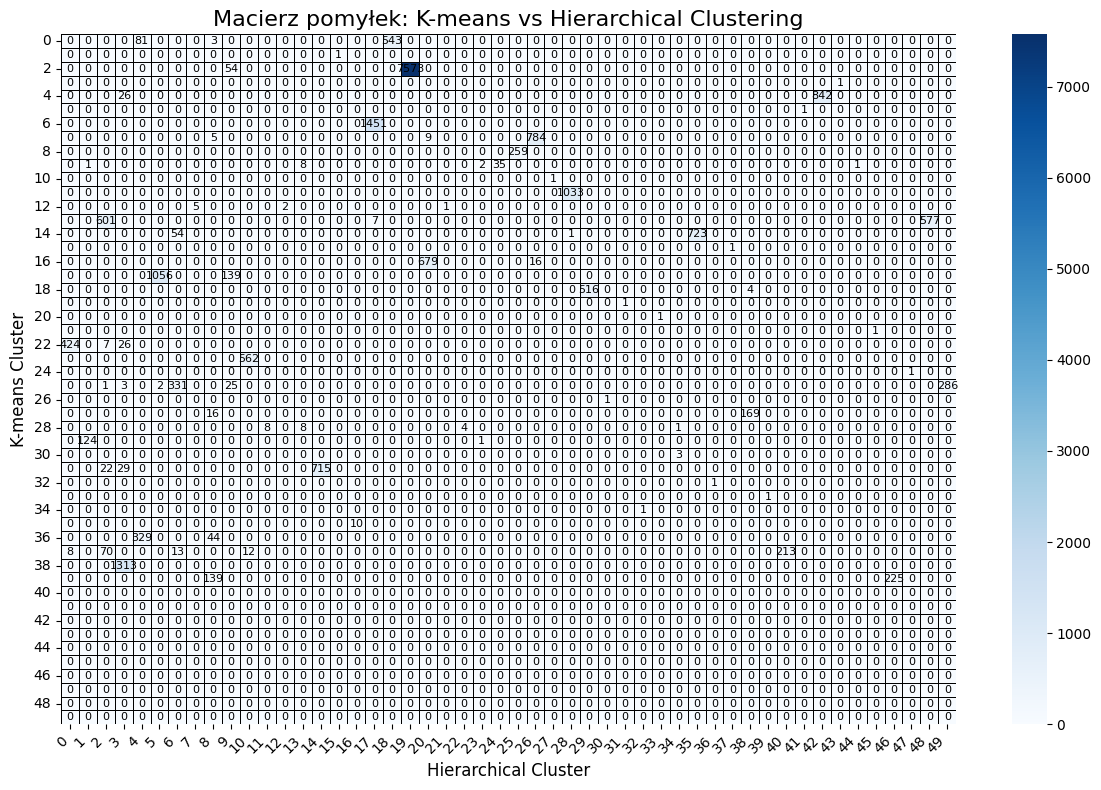


Raport zapisany do pliku 'cluster_reports.txt'.


In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

# Ścieżki plików
kmeans_file_path = "kmeans_40_clusters.csv"
hierarchical_file_path = "hierarchical_clustering_results.csv"
kmeans_data = pd.read_csv(kmeans_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)
kmeans_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)

# Łączenie danych
merged_kmeans_hierarchical = pd.merge(kmeans_data, hierarchical_data, on='Gene')

def compare_and_report_clusters(df, kmeans_col, hierarchical_col, min_common_genes=5, top_n=None):
    kmeans_clusters = df.groupby(kmeans_col)['Gene'].apply(set)
    hierarchical_clusters = df.groupby(hierarchical_col)['Gene'].apply(set)

    best_matches = []
    reports = []

    with open("cluster_reports.txt", "w") as f:
        f.write("Raport klastrów K-means i hierarchicznych\n")
        f.write("=" * 60 + "\n")

        for kmeans_cluster, kmeans_genes in kmeans_clusters.items():
            best_match = None
            max_overlap = 0
            best_hierarchical_genes = set()
            matches = []

            for hierarchical_cluster, hierarchical_genes in hierarchical_clusters.items():
                overlap = len(kmeans_genes & hierarchical_genes)
                if overlap > max_overlap:
                    max_overlap = overlap
                    best_match = hierarchical_cluster
                    best_hierarchical_genes = hierarchical_genes

                if overlap >= min_common_genes:
                    matches.append({
                        'K-means Cluster': kmeans_cluster,
                        'Hierarchical Cluster': hierarchical_cluster,
                        'Common Genes Count': overlap,
                        'Total Genes in K-means Cluster': len(kmeans_genes),
                    })

            best_matches.append({
                'K-means Cluster': kmeans_cluster,
                'K-means Genes': len(kmeans_genes),
                'Best Hierarchical Cluster': best_match,
                'Hierarchical Genes': len(best_hierarchical_genes),
                'Common Genes': max_overlap
            })

            # Sortowanie i ograniczenie do top_n
            sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
            if top_n:
                sorted_matches = sorted_matches[:top_n]

            for match in sorted_matches:
                report = (
                    f"Klaster {match['K-means Cluster']} w K-means ma {match['Total Genes in K-means Cluster']} genów, "
                    f"z czego {match['Common Genes Count']} genów współdzieli z klastrem hierarchicznym {match['Hierarchical Cluster']}.\n"
                )
                reports.append(report)
                f.write(report)

        # Sekcja podsumowująca najlepsze dopasowania
        f.write("\nNajlepsze dopasowania dla każdego klastra K-means (posortowane malejąco):\n")
        best_matches = sorted(best_matches, key=lambda x: x['Common Genes'], reverse=True)
        for match in best_matches:
            summary = (
                f"K-means Cluster {match['K-means Cluster']} ({match['K-means Genes']} genów) "
                f"najlepiej dopasowany do klastra hierarchicznego {match['Best Hierarchical Cluster']} "
                f"({match['Hierarchical Genes']} genów) ({match['Common Genes']} wspólnych genów)\n"
            )
            f.write(summary)
            print(summary)

        # Tworzenie macierzy pomyłek
        conf_matrix = confusion_matrix(df[kmeans_col], df[hierarchical_col])
        f.write("\nMacierz pomyłek K-means vs Hierarchical Clustering:\n")
        f.write(str(conf_matrix) + "\n")

        # Obliczenie Adjusted Rand Index
        ari = adjusted_rand_score(df[kmeans_col], df[hierarchical_col])
        ari_report = f"\nAdjusted Rand Index (ARI): {ari}\n"
        f.write(ari_report)
        print(ari_report)

    # Wyświetlenie macierzy pomyłek
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=True,
        annot_kws={"size": 8, "color": "black"},
        linecolor='black',
        linewidths=0.5
    )
    plt.title('Macierz pomyłek: K-means vs Hierarchical Clustering', fontsize=16)
    plt.xlabel('Hierarchical Cluster', fontsize=12)
    plt.ylabel('K-means Cluster', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

    print("\nRaport zapisany do pliku 'cluster_reports.txt'.")

    return best_matches, reports, conf_matrix, ari

# Wywołanie funkcji
best_matches, reports, conf_matrix, ari = compare_and_report_clusters(
    merged_kmeans_hierarchical, 'Cluster_40', 'Agg_Cluster_50', min_common_genes=5, top_n=5
)


In [59]:
# Funkcja generująca szczegółowy raport
def generate_detailed_report(best_matches, kmeans_clusters=40, hierarchical_clusters=50):
    """
    Tworzy szczegółowy raport dopasowania klastrów K-means do klastrów hierarchicznych
    i zapisuje go do pliku o bardziej szczegółowej nazwie.
    """
    filename = f"best_matches_K{kmeans_clusters}_H{hierarchical_clusters}.txt"

    with open(filename, "w") as file:
        file.write(f"Szczegółowy raport dopasowania klastrów K-means ({kmeans_clusters} klastrów) "
                   f"do klastrów hierarchicznych ({hierarchical_clusters} klastrów):\n\n")
        for match in best_matches:
            line = (
                f"K-means Cluster {match['K-means Cluster']} "
                f"({match['K-means Genes']} genów) najlepiej dopasowany do "
                f"klastra hierarchicznego {match['Best Hierarchical Cluster']} "
                f"({match['Hierarchical Genes']} genów) "
                f"({match['Common Genes']} wspólnych genów)\n"
            )
            file.write(line)

    print(f"Raport zapisano do pliku '{filename}'.")



Raport szczegółowy dopasowań modułów WGCNA do klastrów hierarchicznych:
1. Moduł 1 w WGCNA ma 7615 genów, z czego 4409 genów współdzieli z klastrem 21 w hierarchicznym klastrowaniu.
2. Moduł 1 w WGCNA ma 7615 genów, z czego 202 genów współdzieli z klastrem 9 w hierarchicznym klastrowaniu.
3. Moduł 1 w WGCNA ma 7615 genów, z czego 192 genów współdzieli z klastrem 41 w hierarchicznym klastrowaniu.
4. Moduł 1 w WGCNA ma 7615 genów, z czego 181 genów współdzieli z klastrem 4 w hierarchicznym klastrowaniu.
5. Moduł 1 w WGCNA ma 7615 genów, z czego 174 genów współdzieli z klastrem 7 w hierarchicznym klastrowaniu.
6. Moduł 0 w WGCNA ma 8172 genów, z czego 2574 genów współdzieli z klastrem 21 w hierarchicznym klastrowaniu.
7. Moduł 0 w WGCNA ma 8172 genów, z czego 531 genów współdzieli z klastrem 4 w hierarchicznym klastrowaniu.
8. Moduł 0 w WGCNA ma 8172 genów, z czego 423 genów współdzieli z klastrem 8 w hierarchicznym klastrowaniu.
9. Moduł 0 w WGCNA ma 8172 genów, z czego 271 genów współd

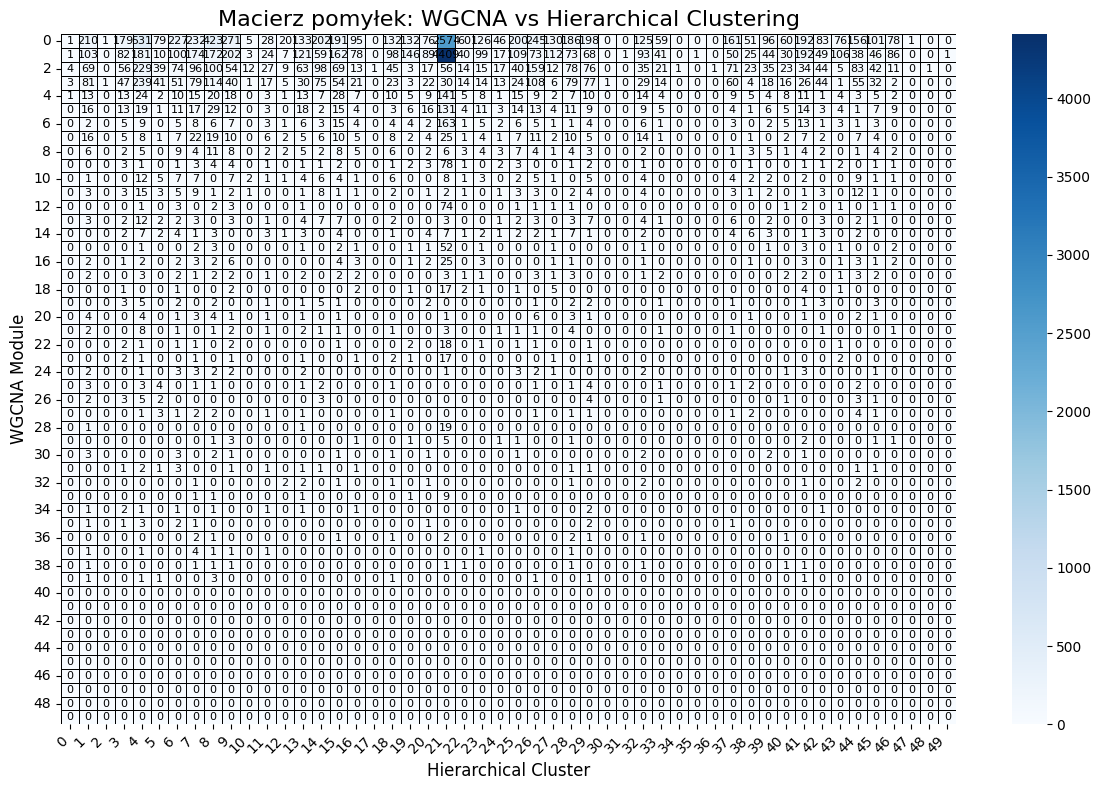


Adjusted Rand Index (ARI): 0.1145


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

wgcna_file_path = 'modules_and_genes.csv'
hierarchical_file_path = 'hierarchical_clustering_results.csv'
wgcna_data = pd.read_csv(wgcna_file_path)
hierarchical_data = pd.read_csv(hierarchical_file_path)


hierarchical_data.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)


merged_wgcna_hierarchical = pd.merge(wgcna_data, hierarchical_data, on='Gene')


def generate_cluster_report(df, wgcna_col, hierarchical_col, min_common_genes=5, top_n=None):
    """
    Generuje raport współdzielenia genów między modułami WGCNA a klastrami hierarchicznymi.

    Args:
        df (pd.DataFrame): Połączony DataFrame z przypisaniami genów.
        wgcna_col (str): Kolumna z numerami modułów WGCNA.
        hierarchical_col (str): Kolumna z numerami klastrów hierarchicznych.
        min_common_genes (int): Minimalna liczba wspólnych genów do uwzględnienia w raporcie.
        top_n (int): Liczba najwyższych wyników do wyświetlenia dla każdego modułu WGCNA.

    Returns:
        List[str]: Lista raportów tekstowych.
    """
    reports = []

    for wgcna_module in df[wgcna_col].unique():
        wgcna_genes = set(df[df[wgcna_col] == wgcna_module]['Gene'])
        matches = []

        for hierarchical_cluster in df[hierarchical_col].unique():
            hierarchical_genes = set(df[df[hierarchical_col] == hierarchical_cluster]['Gene'])
            common_genes = wgcna_genes & hierarchical_genes

            if len(common_genes) >= min_common_genes:
                matches.append({
                    'WGCNA Module': wgcna_module,
                    'Hierarchical Cluster': hierarchical_cluster,
                    'Common Genes Count': len(common_genes),
                    'Total Genes in WGCNA Module': len(wgcna_genes),
                })

        sorted_matches = sorted(matches, key=lambda x: x['Common Genes Count'], reverse=True)
        if top_n:
            sorted_matches = sorted_matches[:top_n]

        for match in sorted_matches:
            report = (
                f"Moduł {match['WGCNA Module']} w WGCNA ma {match['Total Genes in WGCNA Module']} genów, "
                f"z czego {match['Common Genes Count']} genów współdzieli z klastrem {match['Hierarchical Cluster']} w hierarchicznym klastrowaniu."
            )
            reports.append(report)

    return reports

cluster_reports = generate_cluster_report(merged_wgcna_hierarchical, 'Module', 'Agg_Cluster_50', min_common_genes=5, top_n=5)

print("\nRaport szczegółowy dopasowań modułów WGCNA do klastrów hierarchicznych:")
for i, report in enumerate(cluster_reports[:10], 1):
    print(f"{i}. {report}")

with open("wgcna_hierarchical_cluster_reports.txt", "w") as f:
    for report in cluster_reports:
        f.write(report + "\n")
print("\nRaport zapisany do pliku 'wgcna_hierarchical_cluster_reports.txt'.")

conf_matrix = confusion_matrix(merged_wgcna_hierarchical['Module'], merged_wgcna_hierarchical['Agg_Cluster_50'])

plt.figure(figsize=(12, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 8, "color": "black"},
    linecolor='black',
    linewidths=0.5
)
plt.title('Macierz pomyłek: WGCNA vs Hierarchical Clustering', fontsize=16)
plt.xlabel('Hierarchical Cluster', fontsize=12)
plt.ylabel('WGCNA Module', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


ari_wgcna_hierarchical = adjusted_rand_score(
    merged_wgcna_hierarchical['Module'],
    merged_wgcna_hierarchical['Agg_Cluster_50']
)
print(f"\nAdjusted Rand Index (ARI): {ari_wgcna_hierarchical:.4f}")
